# Estate Property Prediction and Analysis

In [4]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the tables
t1 = pd.read_csv('table1.csv')
t2 = pd.read_csv('table2.csv')
t3 = pd.read_csv('table3.csv')

# Concatenate DataFrames
merged_df = pd.merge(t1, t2, on='Serial_Number')

# Merge the result with df3 on 'Serial_Number'
df = pd.merge(merged_df, t3, on='Serial_Number')

In [6]:
df

,Serial_Number,BHK_type,Property_Type,Beds,Bathroom,Balcony,Address,City,State_Code,Country,...,Floor,Transaction_Type,Year_Built,Price_per_square_feet,Furnished_Status,Facing,Car_Parking,Type_of_Ownership,Booking_Amount,Buy_Total_Price
0,1,2,Sapthagiri Palace,2,2.0,2.0,Sapthagiri Palace,Bangalore,KA,India,...,NaN,NaN,NaN,NaN,NaN,NaN,Car,Self Owned,NaN,5300000.0
1,2,3,Pjc Royale Arcadia,3,2.0,2.0,"27th Cross Road, ITI Layout, Sector 2, HSR Lay...",Bangalore,KA,India,...,4/5,NaN,NaN,NaN,NaN,North,Bike and Car,Self Owned,NaN,19000000.0
2,3,3,Nd Sepal,3,3.0,2.0,"Somasundarapalya, Bangalore",Bangalore,KA,India,...,NaN,NaN,NaN,NaN,NaN,NaN,Bike and Car,Self Owned,NaN,10500000.0
3,4,4,Standalone Building,4,17.0,8.0,"Standalone Building, Off Haralur Road near Ken...",Bangalore,KA,India,...,NaN,NaN,NaN,NaN,NaN,NaN,Car,Self Owned,NaN,53000000.0
4,5,4,Independent House,4,7.0,2.0,"Independent House, Behind Bank of Baroda",Bangalore,KA,India,...,NaN,NaN,NaN,NaN,NaN,NaN,Bike and Car,Self Owned,NaN,37500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2991,1,Condo,1,1.0,NaN,535 North Michigan Avenue #2212,Chicago,IL 60611,United States,...,NaN,NaN,1962.0,241,NaN,NaN,NaN,NaN,NaN,17039600.0
2991,2992,2,Condo,2,2.0,NaN,500 South Clinton Street #342,Chicago,IL 60607,United States,...,NaN,NaN,1902.0,245,NaN,NaN,NaN,NaN,NaN,21187288.0
2992,2993,3,Condo,3,2.0,NaN,630 North State Street #2301,Chicago,IL 60654,United States,...,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,56106000.0
2993,2994,2,Condo,2,2.0,NaN,3012 West Addison Street #4S,Chicago,IL 60618,United States,...,NaN,NaN,NaN,250,NaN,NaN,NaN,NaN,NaN,24936000.0


In [7]:
df.to_csv('final_df.csv', index=False)

In [8]:
df.shape

(2995, 23)

In [9]:
df.columns

Index(['Serial_Number', 'BHK_type', 'Property_Type', 'Beds', 'Bathroom',
       'Balcony', 'Address', 'City', 'State_Code', 'Country', 'Landmarks',
       'Carpet_area', 'Status', 'Floor', 'Transaction_Type', 'Year_Built',
       'Price_per_square_feet', 'Furnished_Status', 'Facing', 'Car_Parking',
       'Type_of_Ownership', 'Booking_Amount', 'Buy_Total_Price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial_Number          2995 non-null   int64  
 1   BHK_type               2995 non-null   int64  
 2   Property_Type          2995 non-null   object 
 3   Beds                   2995 non-null   int64  
 4   Bathroom               2995 non-null   float64
 5   Balcony                1859 non-null   float64
 6   Address                2995 non-null   object 
 7   City                   2995 non-null   object 
 8   State_Code             2995 non-null   object 
 9   Country                2995 non-null   object 
 10  Landmarks              2829 non-null   object 
 11  Carpet_area            1139 non-null   object 
 12  Status                 2957 non-null   object 
 13  Floor                  1096 non-null   object 
 14  Transaction_Type       0 non-null      float64
 15  Year

## Comment -
- Train data contain 2995 rows with 23 features and 3 target variables.
- Some feature are categorical in nature.
- There is presense of Null values in data.
- There is missing data in Carpet_area, Buy_Total_Price which need to impute with appropriate method.

## Missing value check

<Axes: >

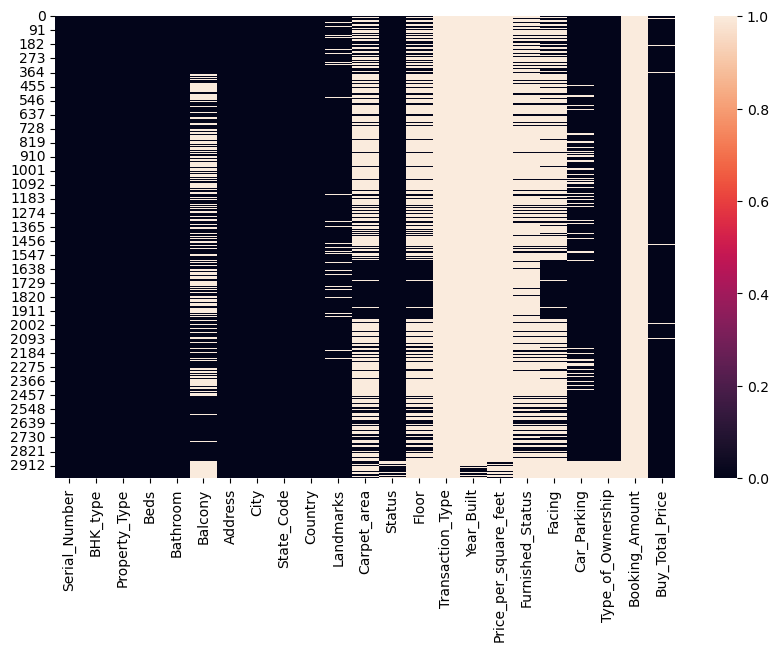

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                       Missing Values  % Missing data
Booking_Amount                   2995      100.000000
Transaction_Type                 2995      100.000000
Price_per_square_feet            2953       98.597663
Year_Built                       2945       98.330551
Furnished_Status                 2410       80.467446
Facing                           1939       64.741235
Floor                            1899       63.405676
Carpet_area                      1856       61.969950
Balcony                          1136       37.929883
Car_Parking                       441       14.724541
Landmarks                         166        5.542571
Type_of_Ownership                 110        3.672788
Buy_Total_Price                    38        1.268781
Status                             38        1.268781
BHK_type                            0        0.000000
Country                             0        0.000000
State_Code                          0        0.000000
City                        

## Comment :
- 'Booking_Amount','Transaction_Type','Price_per_square_feet','Year_Built' contain missing values.
- columns with almost 100 % null value so we are going to drop it.
- Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

In [13]:
df = df.dropna(subset=['Buy_Total_Price'])

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
Serial_Number,2957
BHK_type,6
Property_Type,135
Beds,6
Bathroom,13
Balcony,6
Address,251
City,11
State_Code,17
Country,2


In [17]:
# Droping unnecessary columns
df.drop(['Booking_Amount','Transaction_Type','Address','Serial_Number'],axis=1,inplace=True)

In [18]:
df['Balcony'] = df['Balcony'].replace('Balcony', 1)

In [19]:
df['Balcony'].value_counts()

Balcony
1.0    791
2.0    523
3.0    340
4.0    111
5.0     48
8.0     15
Name: count, dtype: int64

In [20]:
df.loc[df['City'] == 'Chicago', 'State_Code'] = 'IL'

In [21]:
df['State_Code'].value_counts()

State_Code
UP    761
MH    591
HR    510
DL    375
KA    360
TN    250
IL    110
Name: count, dtype: int64

In [22]:
df = df[df['Status'].isin(['Immediately', 'Active'])]

In [23]:
df['Status'].value_counts()

Status
Immediately    2159
Active           72
Name: count, dtype: int64

In [24]:
df = df[df['Bathroom'] <= 7]

In [25]:
df = df[(df['Bathroom'] <= 7) & (df['Bathroom'] == df['Bathroom'].astype(int))]

In [26]:
df['Bathroom'].value_counts().sort_index()

Bathroom
1.0     384
2.0    1074
3.0     494
4.0     212
5.0      30
6.0       7
7.0      10
Name: count, dtype: int64

## Missing Value Indentification

In [27]:
#Checking null values-
df.isnull().sum()

BHK_type                    0
Property_Type               0
Beds                        0
Bathroom                    0
Balcony                   882
City                        0
State_Code                  0
Country                     0
Landmarks                  96
Carpet_area              1588
Status                      0
Floor                    1601
Year_Built               2161
Price_per_square_feet    2191
Furnished_Status         1752
Facing                   1626
Car_Parking               403
Type_of_Ownership          72
Buy_Total_Price             0
dtype: int64

In [28]:
df5=df

In [29]:
d6=df5.copy()

In [30]:
df.drop(['Balcony', 'Carpet_area', 'Floor', 'Year_Built', 
                   'Price_per_square_feet', 'Furnished_Status', 'Facing'], axis=1, inplace=True)

In [31]:
df.columns

Index(['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Type_of_Ownership',
       'Buy_Total_Price'],
      dtype='object')

In [32]:
df['Country'].value_counts().sort_index()

Country
India            2139
United States      72
Name: count, dtype: int64

In [33]:
df.isnull().sum()

BHK_type               0
Property_Type          0
Beds                   0
Bathroom               0
City                   0
State_Code             0
Country                0
Landmarks             96
Status                 0
Car_Parking          403
Type_of_Ownership     72
Buy_Total_Price        0
dtype: int64

<Axes: >

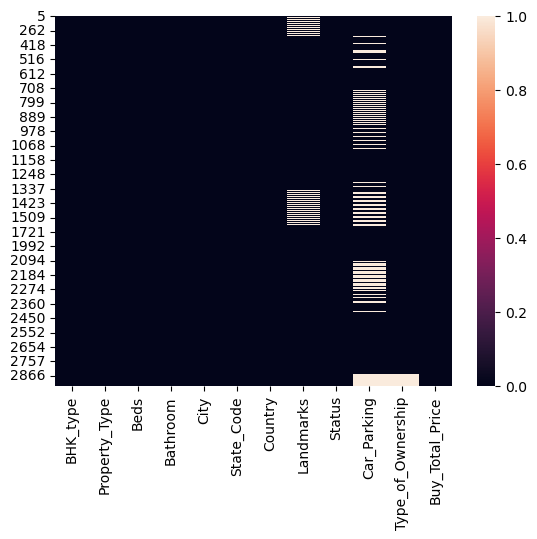

In [34]:
sns.heatmap(df.isnull())

## Imputation of Missing Values

In [35]:
df['Landmarks'].fillna(value=df['Landmarks'].mode()[0], inplace= True)

In [36]:
df['Property_Type'].fillna(value=df['Property_Type'].mode()[0], inplace= True)

In [37]:
df['Car_Parking'].fillna(value=df['Car_Parking'].mode()[0], inplace= True)

In [38]:
df.isnull().sum()

BHK_type              0
Property_Type         0
Beds                  0
Bathroom              0
City                  0
State_Code            0
Country               0
Landmarks             0
Status                0
Car_Parking           0
Type_of_Ownership    72
Buy_Total_Price       0
dtype: int64

## Missing value check after imputation

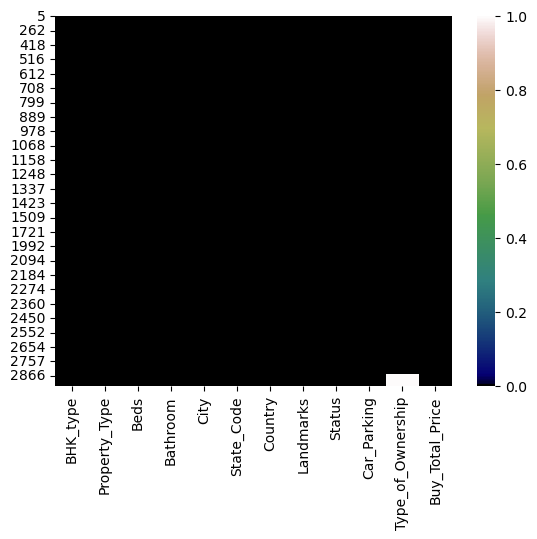

In [39]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

- Now no missing values are present.

## Categorical Data

### Categorical Data: "Property_Type"

In [40]:
most_property_type = df["Property_Type"].value_counts()
most_property_type

Property_Type
Standalone Building       432
Independent House         406
Condo                      72
Purvanchal Royal Pa...     49
Apartment                  45
                         ... 
Habitat 78                  6
Indraprastha Apartm...      6
Conscient Habitat-78        6
Eros Wembley Estate         6
Gaur Yamuna City 16...      6
Name: count, Length: 104, dtype: int64

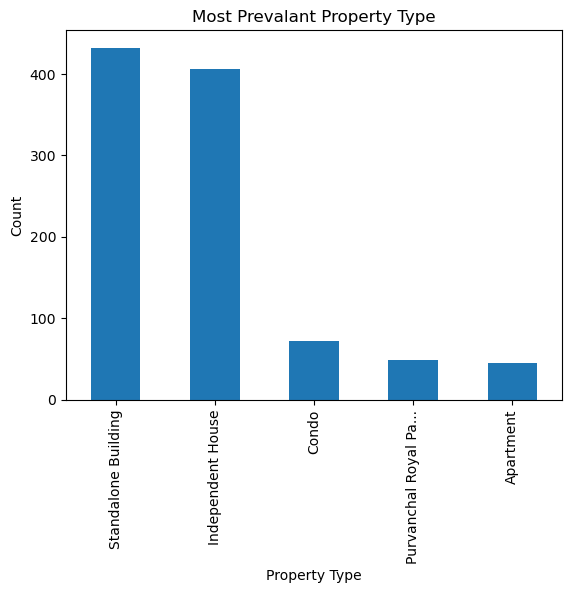

In [41]:
top_5_categories = most_property_type.nlargest(5)
top_5_categories.plot(kind='bar')
plt.title('Most Prevalant Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')

# Show the plot
plt.show()

- There are five major property types in this dataset 

### Categorical Data: "City"

In [42]:
# Get value counts of "City" column
df["City"].value_counts()

City
Delhi            360
Greater Noida    357
Gurgaon          320
Chennai          240
Pune             216
Ghaziabad        168
Faridabad        150
Noida            133
Bangalore        120
Mumbai            75
Chicago           72
Name: count, dtype: int64

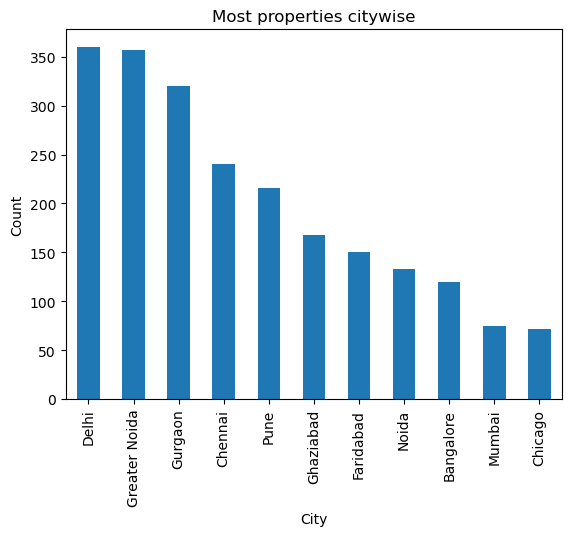

In [43]:
df["City"].value_counts().plot(
    kind = 'bar',
    xlabel = 'City',
    ylabel = 'Count',
    title = 'Most properties citywise',
);

- Greater Noida has the maximum number of properties closely followed by Bangalore, Delhi, Mumbai and Gurgaon

### Categorical Data: "State_Code"

In [44]:
# Get value counts of "state_code" column
df["State_Code"].value_counts()

State_Code
UP    658
HR    470
DL    360
MH    291
TN    240
KA    120
IL     72
Name: count, dtype: int64

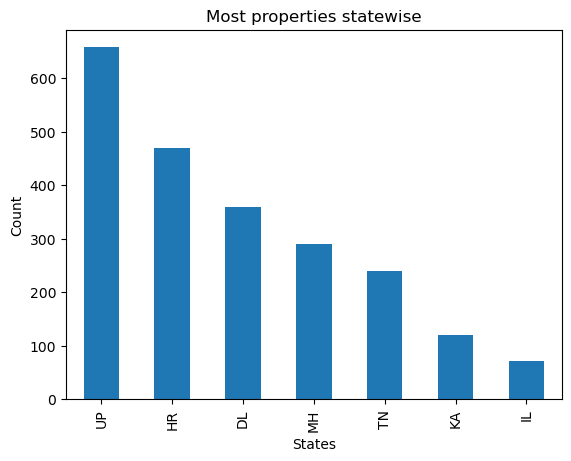

In [45]:
df["State_Code"].value_counts().plot(
    kind = 'bar',
    xlabel = 'States',
    ylabel = 'Count',
    title = 'Most properties statewise',
);

- UP, MH AND HR have the most property count

### Categorical Data: "Status"

In [46]:
# Get value counts of "state_code" column
df["Status"].value_counts()

Status
Immediately    2139
Active           72
Name: count, dtype: int64

### Categorical Data: "Car_Parking"

In [47]:
df["Car_Parking"].value_counts()

Car_Parking
Bike and Car    1428
Car              459
Bike             324
Name: count, dtype: int64

### Categorical Data: "Type_of_Ownership"

In [48]:
df["Type_of_Ownership"].value_counts()

Type_of_Ownership
Self Owned           2122
On Lease 99 Years      17
Name: count, dtype: int64

## Numerical Data:  "Buy_Total_Price"

In [49]:
df['Buy_Total_Price'].value_counts()

Buy_Total_Price
4000000.0     114
15000000.0     96
3500000.0      92
6000000.0      62
11000000.0     59
             ... 
17039600.0      3
21187288.0      3
56106000.0      3
24936000.0      3
23689200.0      3
Name: count, Length: 123, dtype: int64

In [50]:
df.duplicated().sum()

1992

In [51]:
df = df.drop_duplicates()

In [52]:
df.duplicated().sum()

0

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
df

,BHK_type,Property_Type,Beds,Bathroom,City,State_Code,Country,Landmarks,Status,Car_Parking,Type_of_Ownership,Buy_Total_Price
0,2,Nsr Brindavan Annex...,2,2.0,Bangalore,KA,India,Narasimha Chitramandira,Immediately,Bike and Car,Self Owned,9300000.0
1,3,"Aratt Royal Manor, ...",3,3.0,Bangalore,KA,India,Narasimha Chitramandira,Immediately,Bike and Car,Self Owned,15000000.0
2,2,Dream Homes Our Pla...,2,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Immediately,Car,Self Owned,8900000.0
3,2,Cheri Residency,2,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Immediately,Bike and Car,Self Owned,7500000.0
4,2,Prestige Ferns Resi...,2,2.0,Bangalore,KA,India,Byg Brewski Brewing Company,Immediately,Car,Self Owned,18000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
214,1,Condo,1,1.0,Chicago,IL,United States,CHI - Near North Side,Active,Bike and Car,NaN,17039600.0
215,2,Condo,2,2.0,Chicago,IL,United States,CHI - Near West Side,Active,Bike and Car,NaN,21187288.0
216,3,Condo,3,2.0,Chicago,IL,United States,CHI - Near North Side,Active,Bike and Car,NaN,56106000.0
217,2,Condo,2,2.0,Chicago,IL,United States,CHI - Irving Park,Active,Bike and Car,NaN,24936000.0


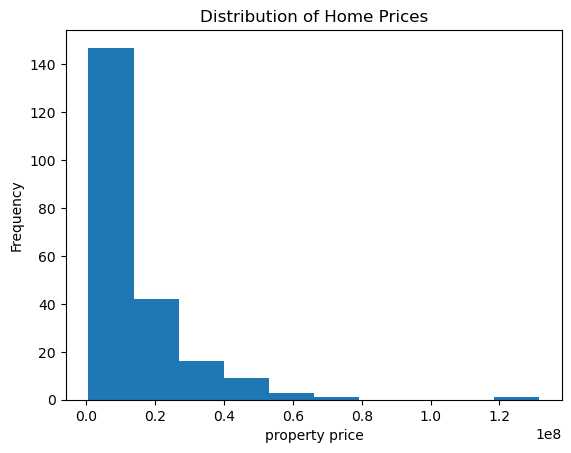

In [55]:
# Use Matplotlib to create histogram of "price_aprox_usd"
plt.hist(df['Buy_Total_Price'])
# Add x-axis label
plt.xlabel('property price')
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");

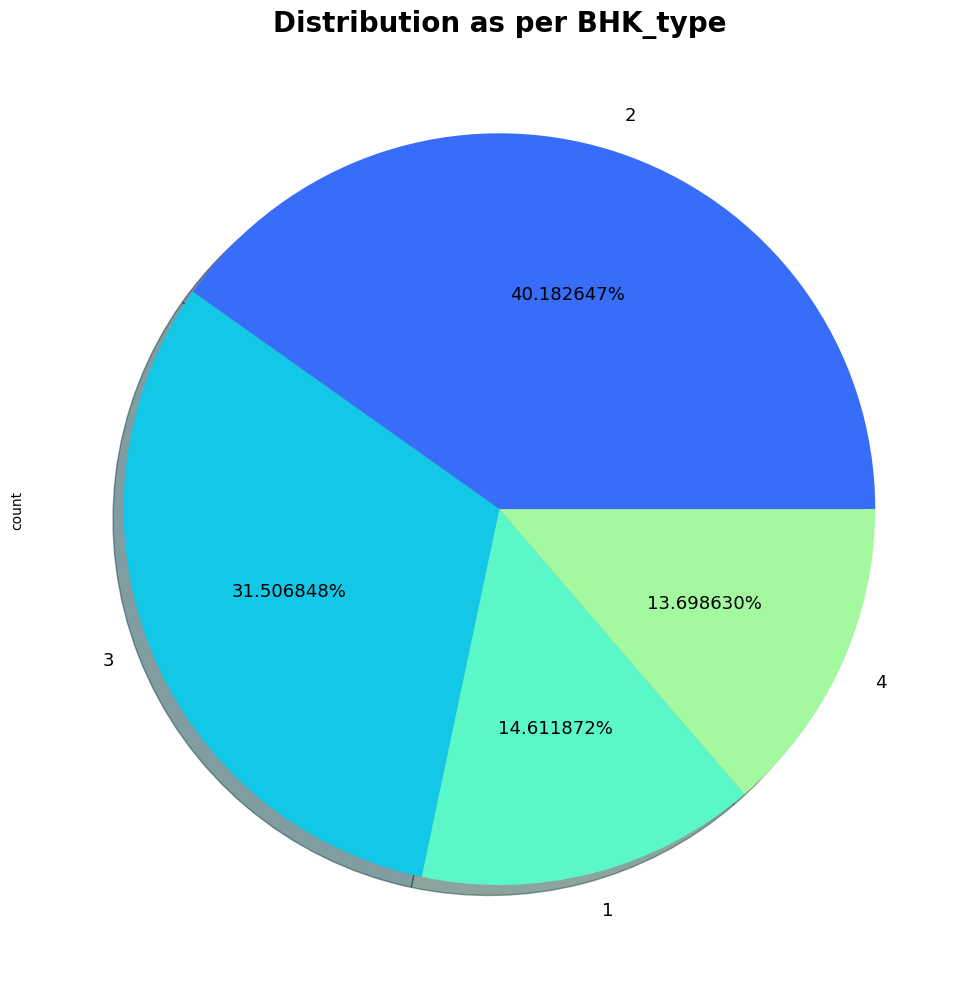

In [56]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['BHK_type'].value_counts().plot.pie(autopct='%0.6f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title( 'Distribution as per BHK_type', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

## Univariate Analysis

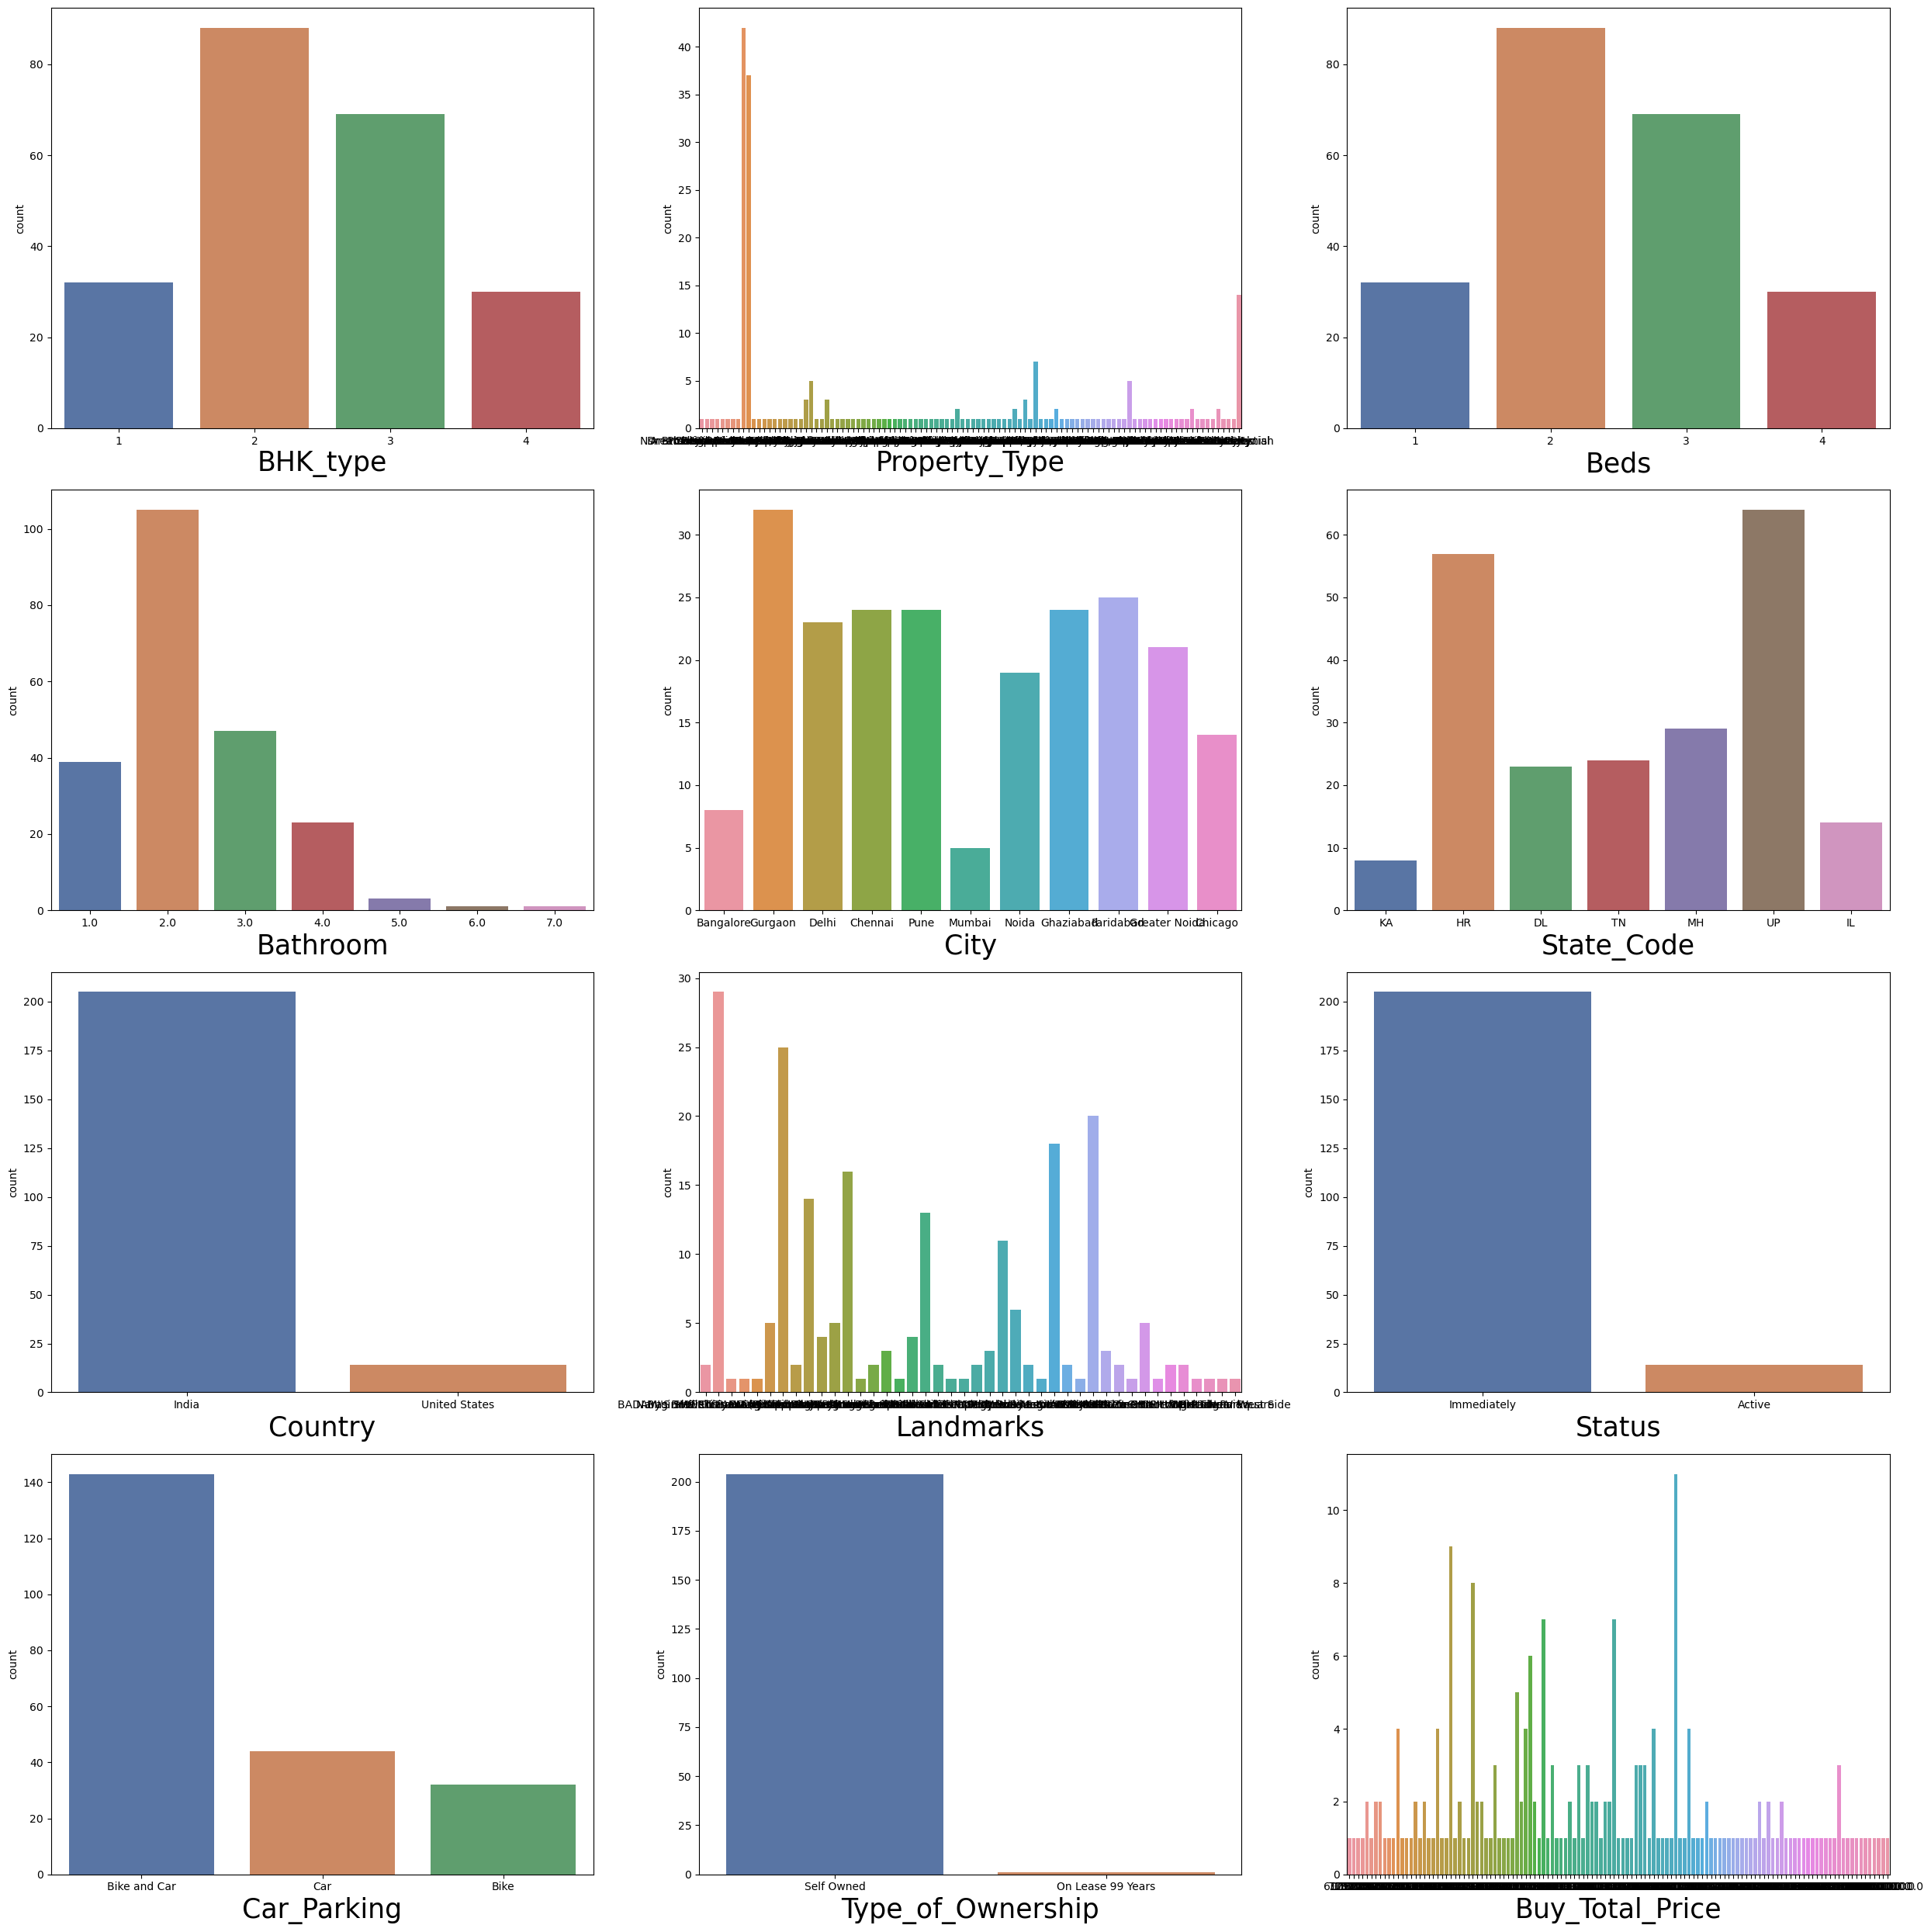

In [57]:
sns.set_palette('deep')
plt.figure(figsize=(25,25))

categories =['BHK_type', 'Property_Type', 'Beds', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Status', 'Car_Parking', 'Type_of_Ownership',
       'Buy_Total_Price']

for i, category in enumerate(categories, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

In [58]:
df.drop(['Beds'], axis=1, inplace=True)

In [59]:
df.drop('Status', axis=1, inplace=True)

In [60]:
df.drop('Type_of_Ownership', axis=1, inplace=True)

In [61]:
df.columns

Index(['BHK_type', 'Property_Type', 'Bathroom', 'City', 'State_Code',
       'Country', 'Landmarks', 'Car_Parking', 'Buy_Total_Price'],
      dtype='object')

## Bivariate Analysis

<Figure size 1000x800 with 0 Axes>

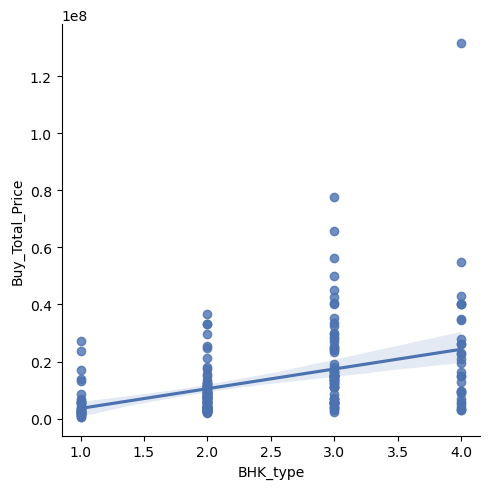

In [62]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='BHK_type', y='Buy_Total_Price', data=df)

- number of BHK types increases, there is increase in the Buy_Total_Price.

<Figure size 1000x800 with 0 Axes>

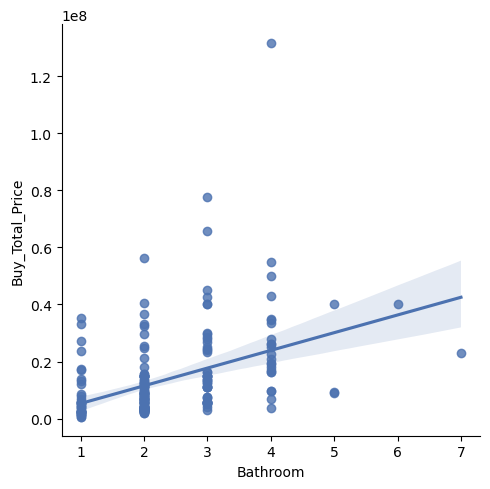

In [63]:
plt.figure(figsize=(10, 8))
sns.lmplot(x='Bathroom', y='Buy_Total_Price', data=df)

<Axes: xlabel='City', ylabel='Buy_Total_Price'>

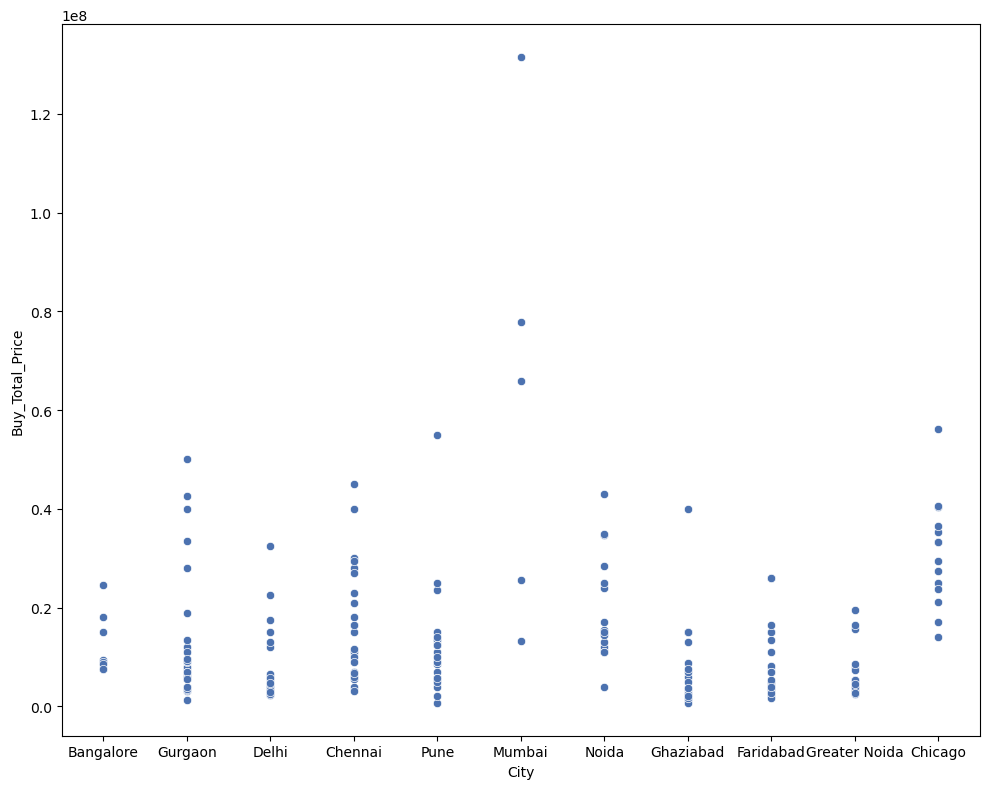

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='City', y='Buy_Total_Price', data=df)

- property prices in Pune, Gurgaon, and Chennai are higher compared to other cities.

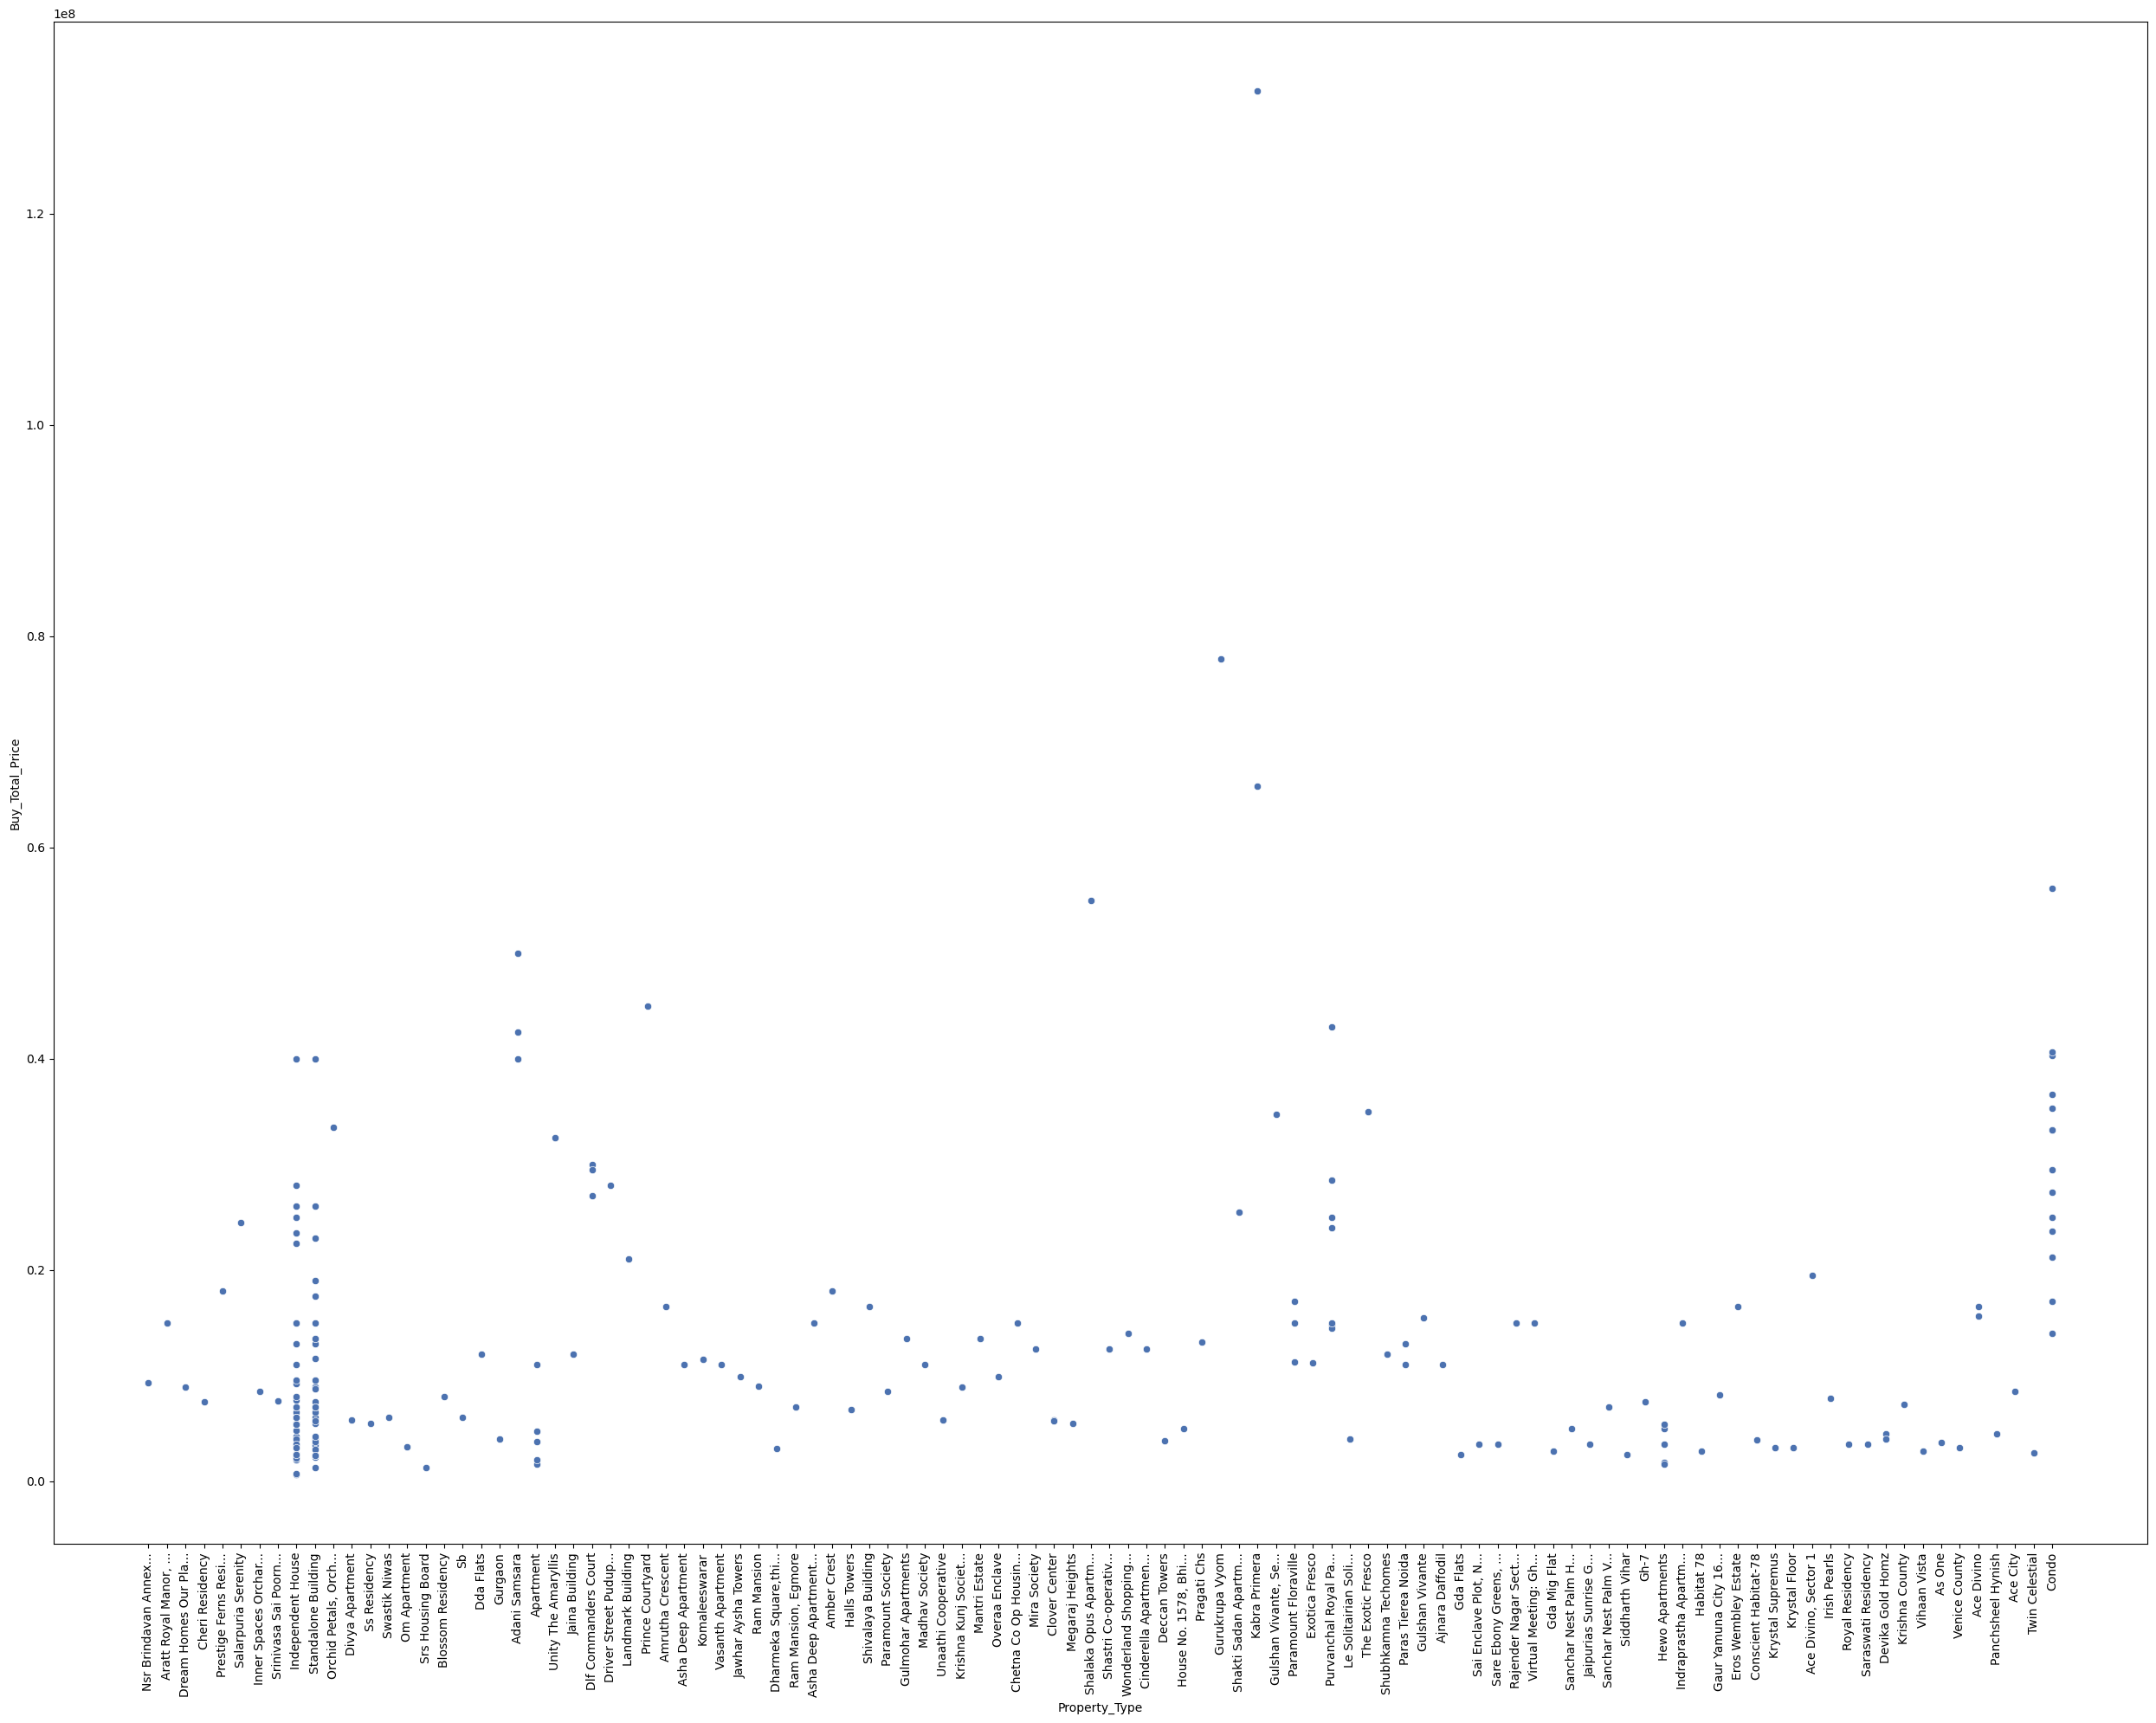

In [65]:
plt.figure(figsize=(25, 20))
sns.scatterplot(x='Property_Type', y='Buy_Total_Price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='State_Code', ylabel='Buy_Total_Price'>

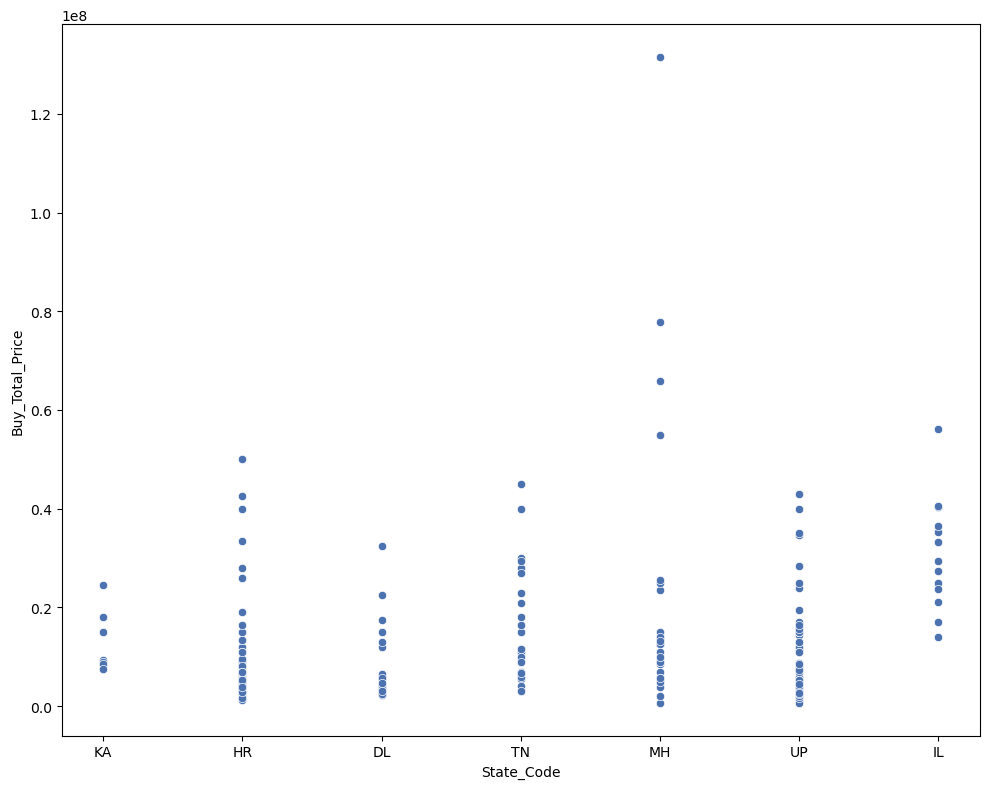

In [66]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='State_Code', y='Buy_Total_Price', data=df)

<Axes: xlabel='Car_Parking', ylabel='Buy_Total_Price'>

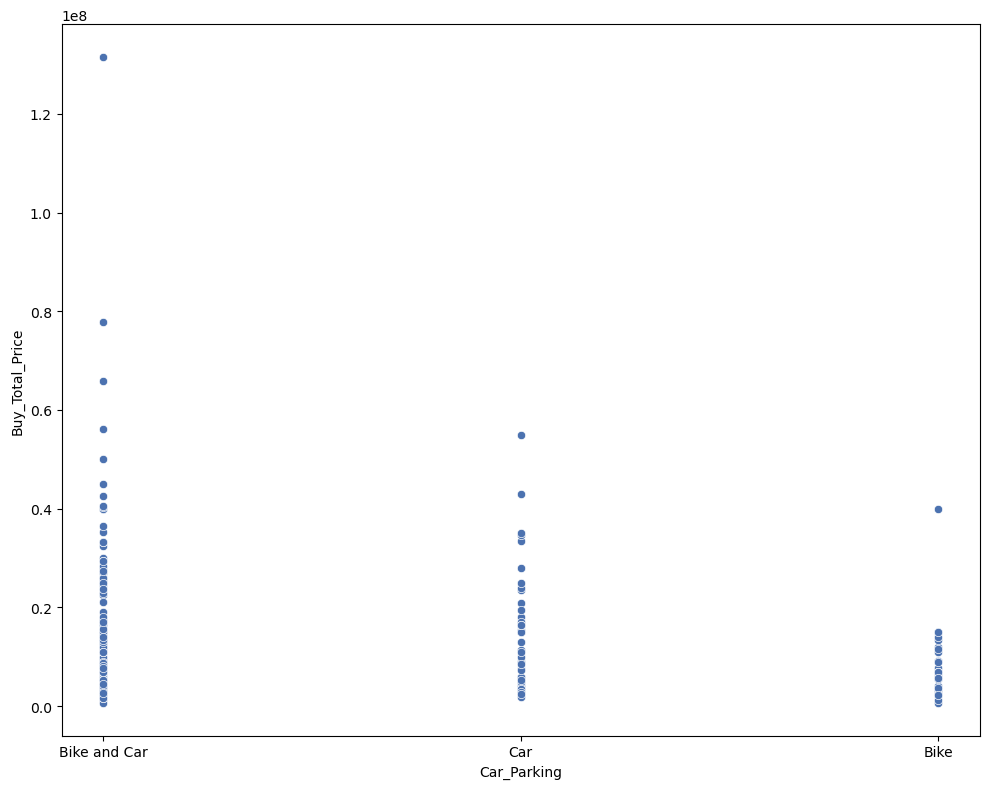

In [67]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Car_Parking', y='Buy_Total_Price', data=df)

## Multivariate analysis

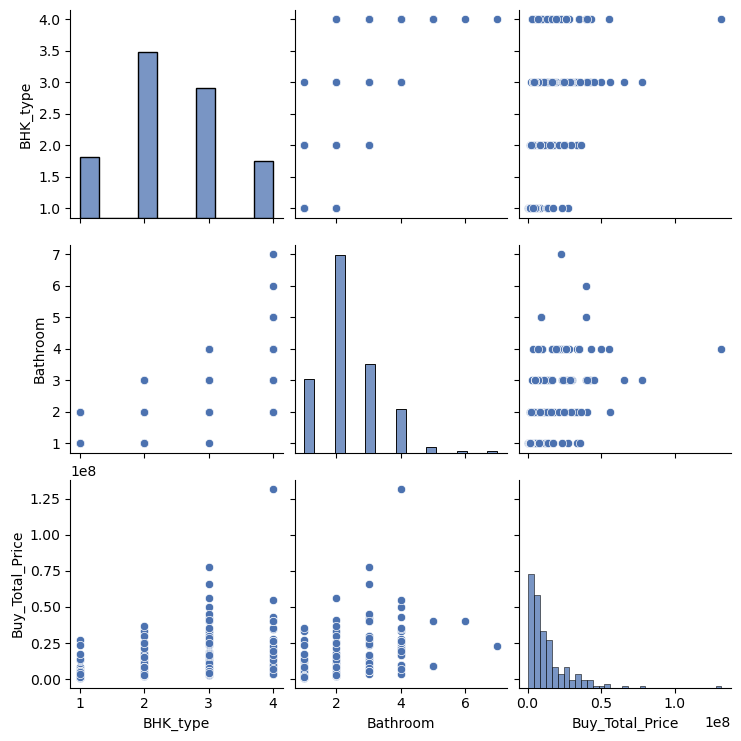

In [68]:
sns.pairplot(df)
plt.show()

In [69]:
num_col = []
for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        num_col.append(i)


In [70]:
num_col

['BHK_type', 'Bathroom', 'Buy_Total_Price']

In [71]:
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [72]:
cat_col

['Property_Type', 'City', 'State_Code', 'Country', 'Landmarks', 'Car_Parking']

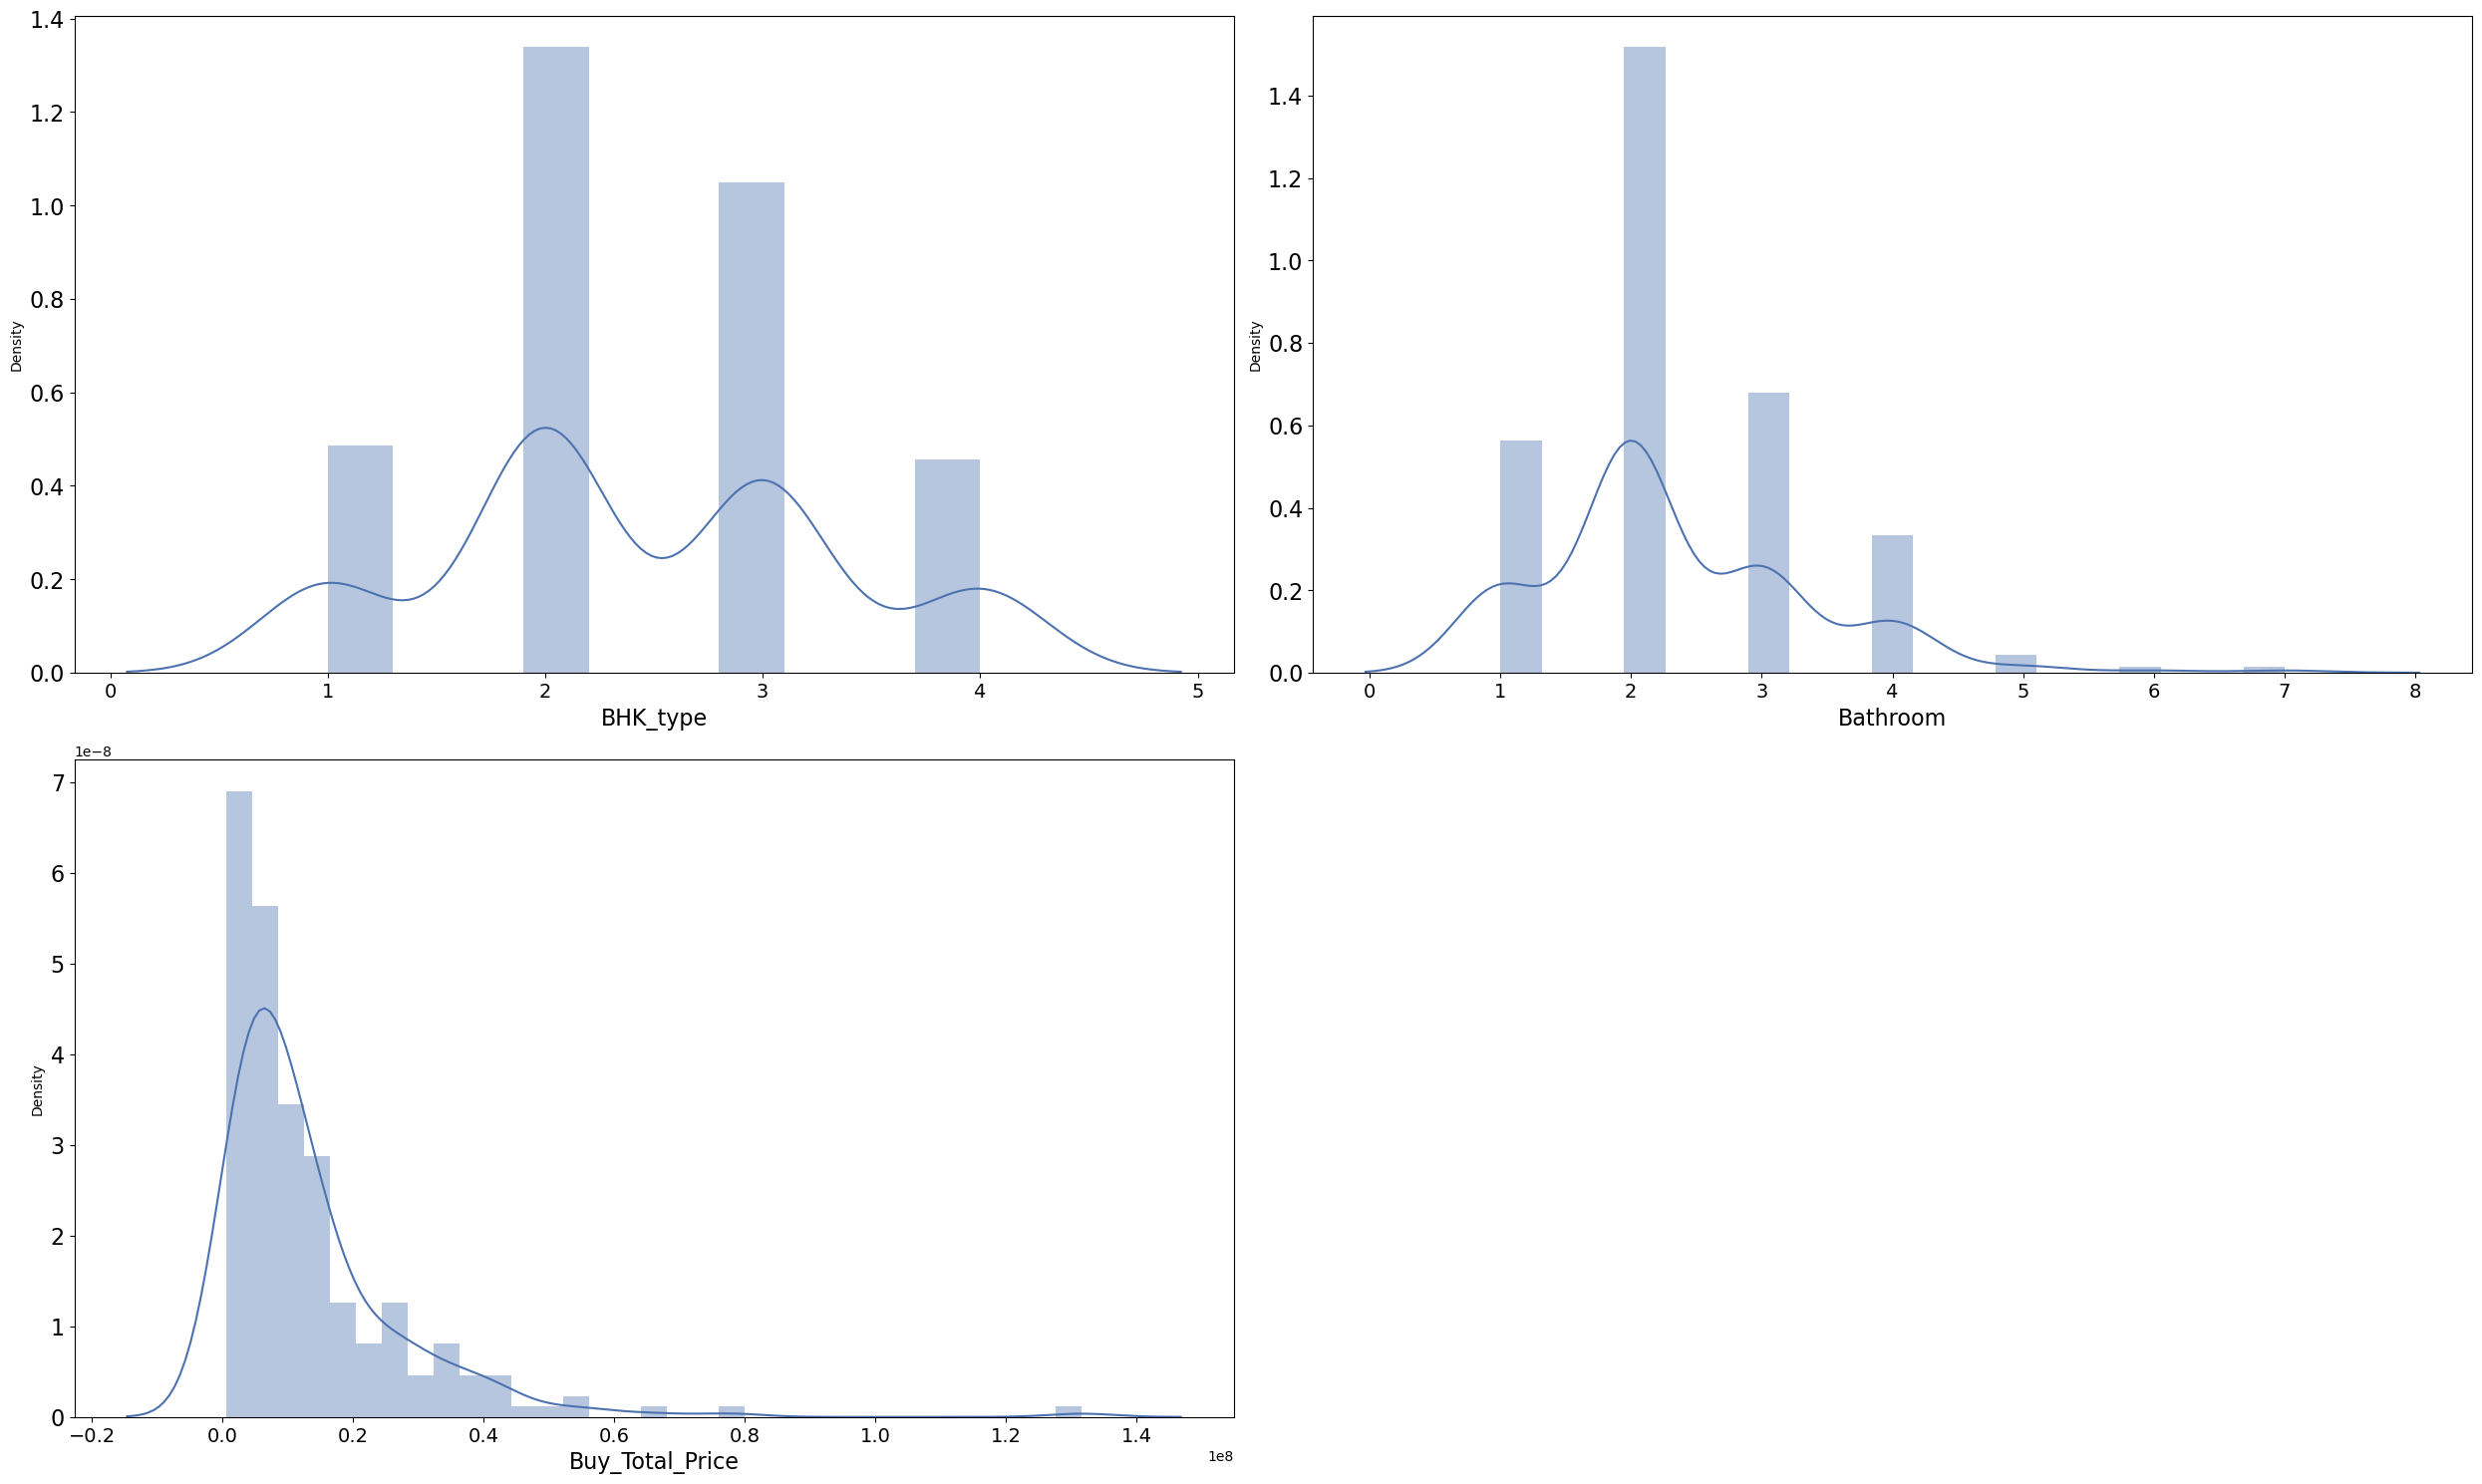

In [73]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()   

In [74]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.134243
Bathroom           1.056005
Buy_Total_Price    3.421698
dtype: float64


In [75]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

features = ['Buy_Total_Price']
x = PowerTransformer(method='yeo-johnson') 

df[features] = pd.DataFrame(x.fit_transform(df[features].values))

In [76]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print(skewness)

BHK_type           0.134243
Bathroom           1.056005
Buy_Total_Price    0.002026
dtype: float64


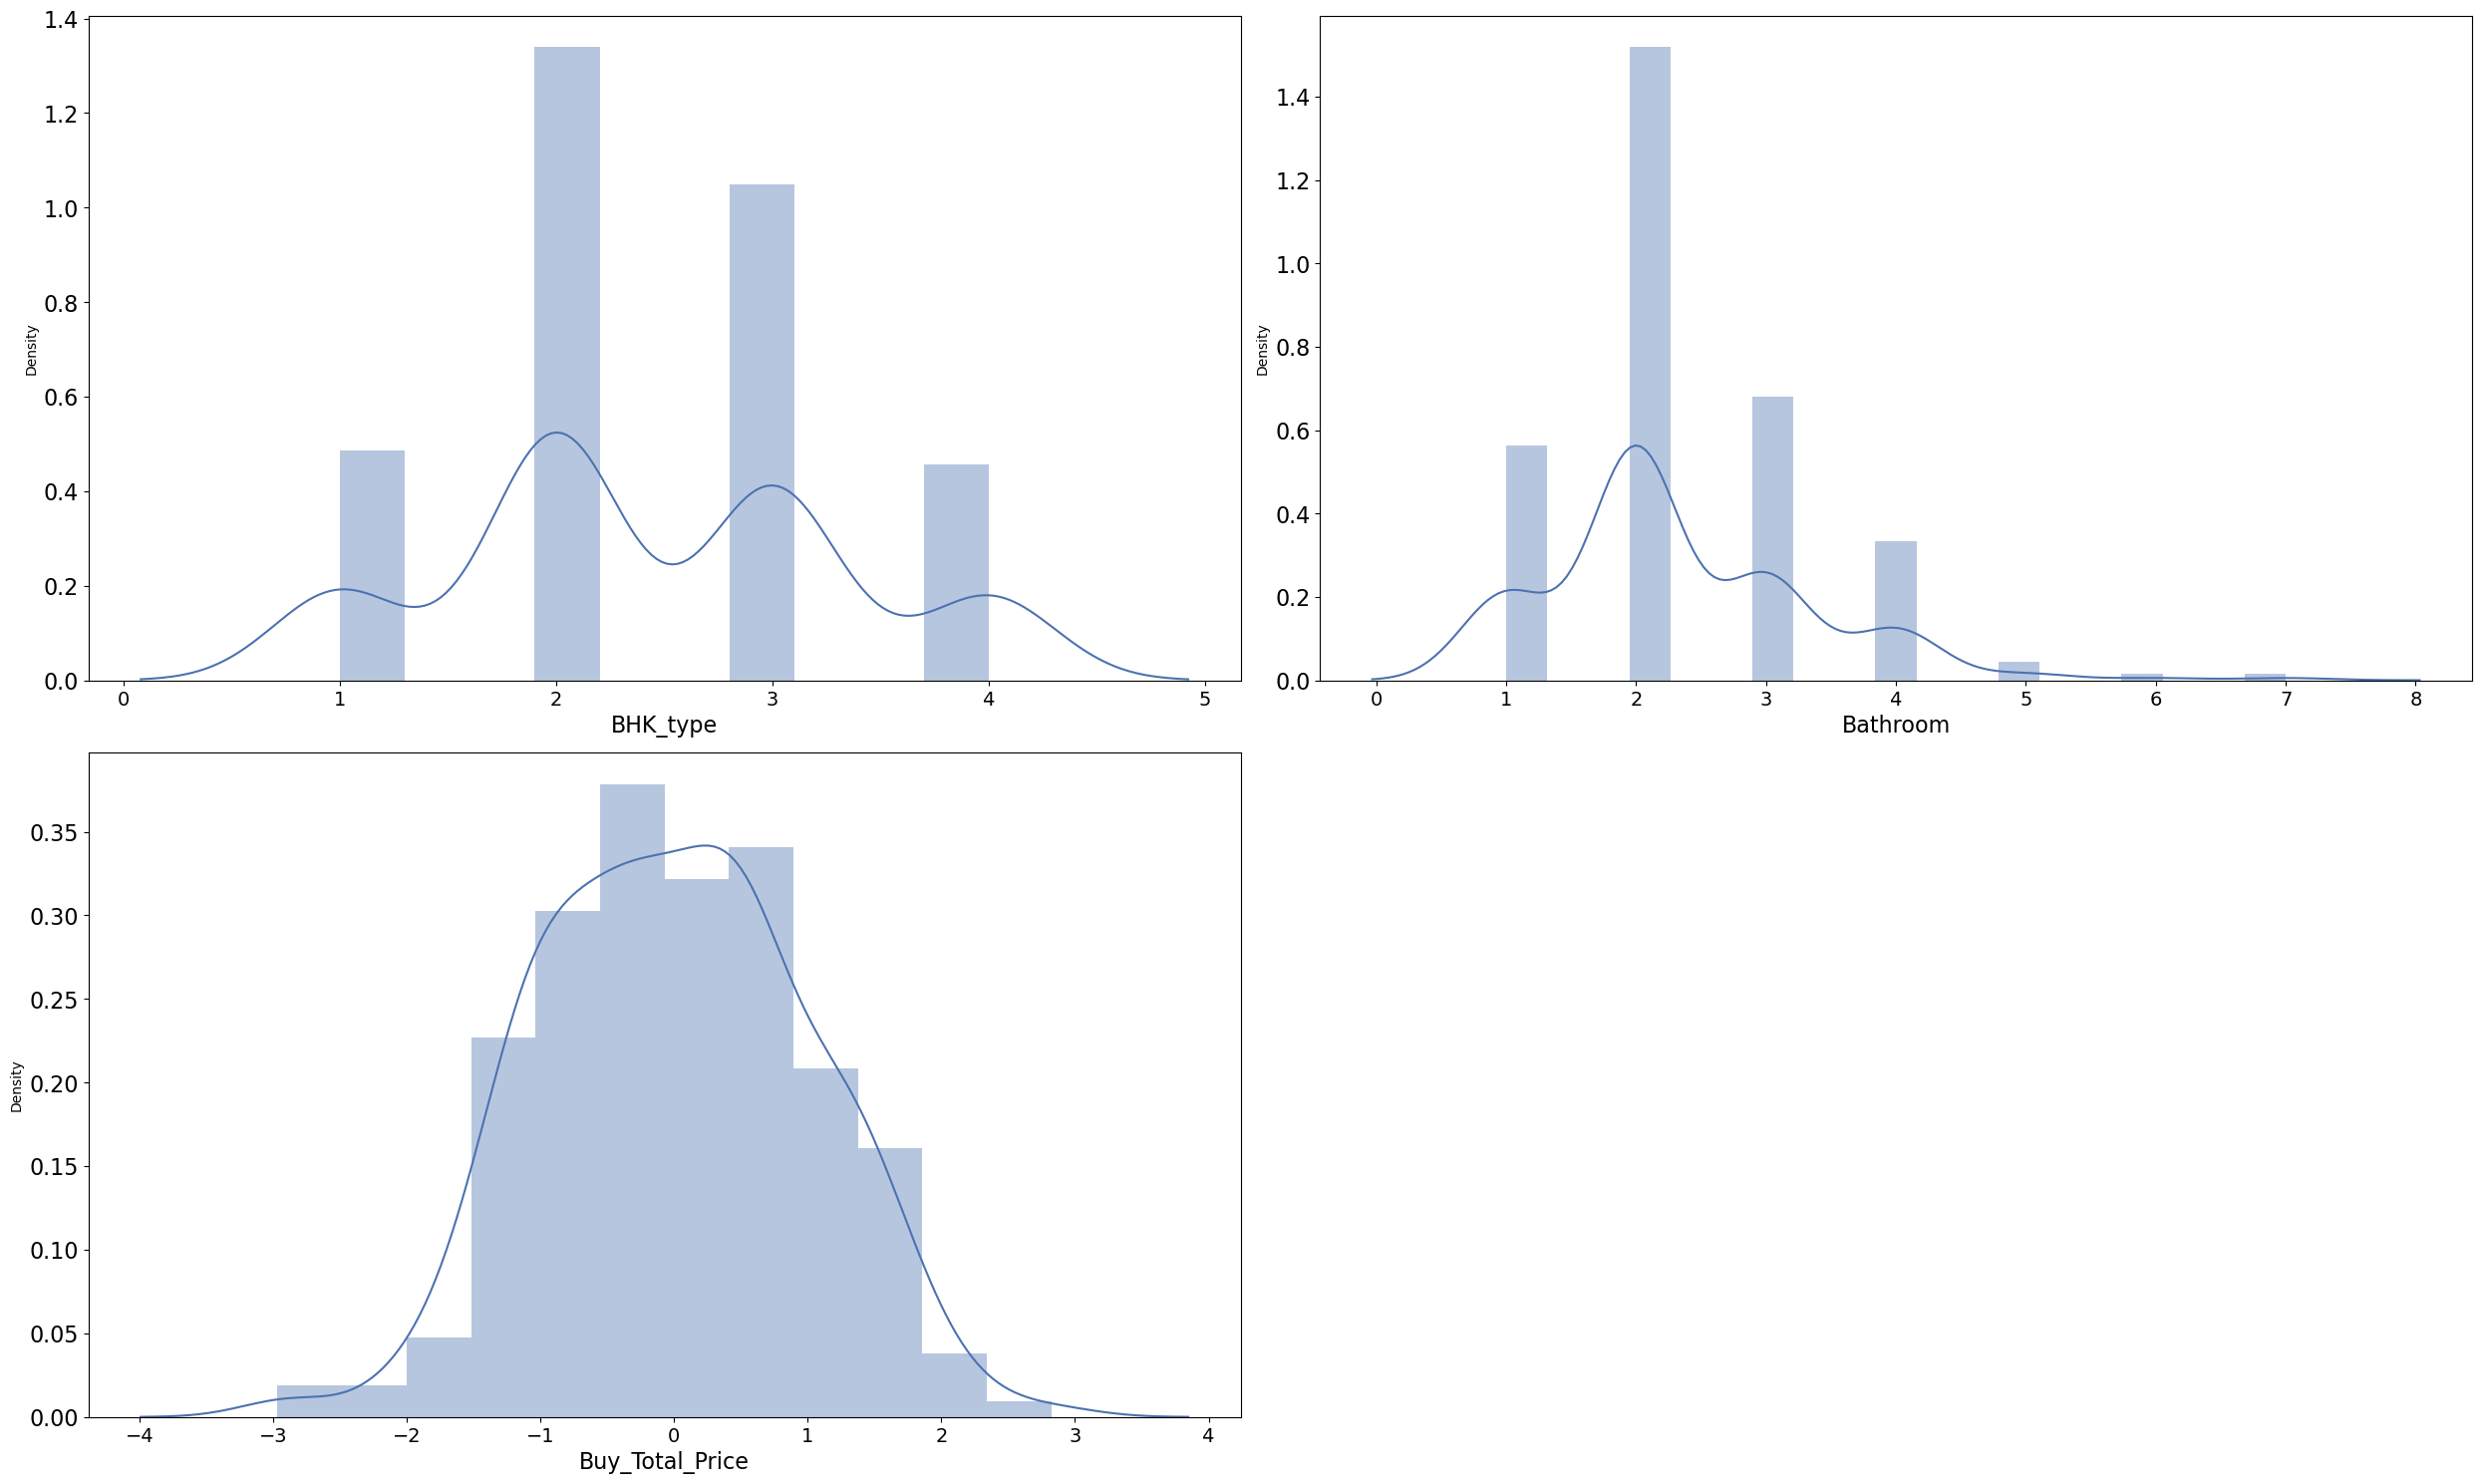

In [77]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<10:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()    

## Outliers Detection and Removal

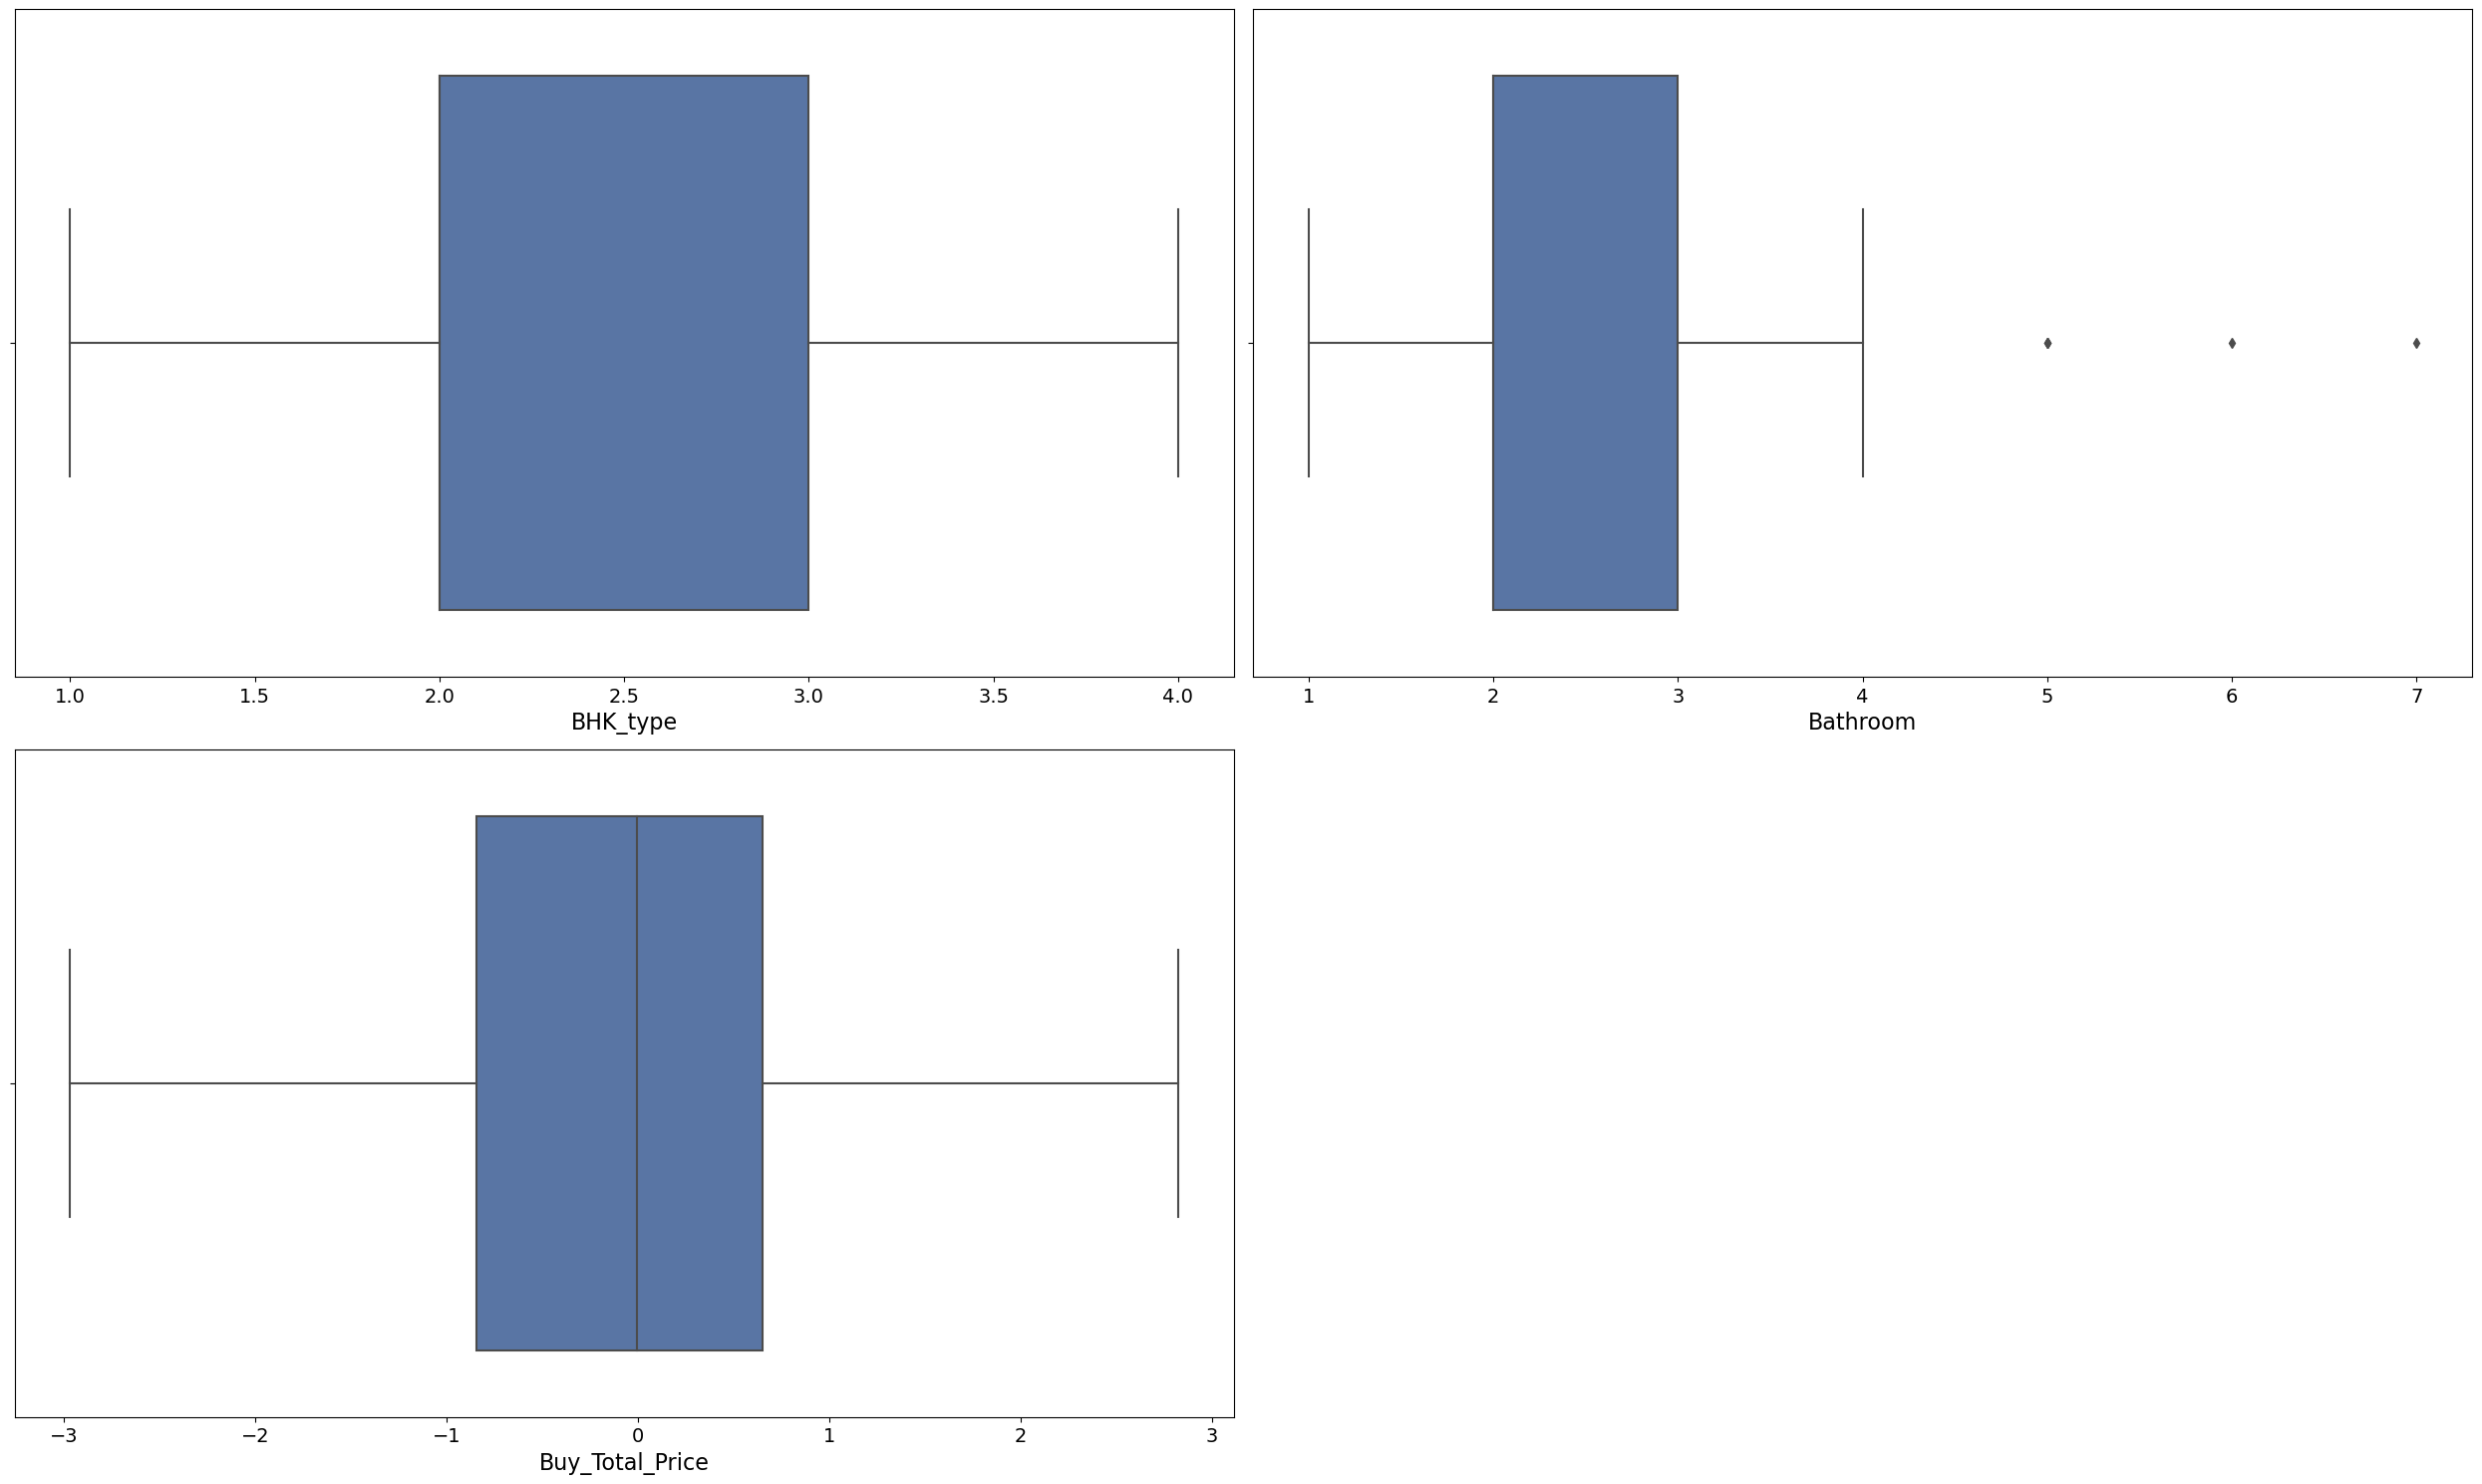

In [78]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

## Removing outliers 

In [79]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


q1 = numeric_df.quantile(0.25)

q3 = numeric_df.quantile(0.75)


IQR = q3 - q1

In [80]:
high_Buy_Total_Price=(q3['Buy_Total_Price']+(1.5*IQR['Buy_Total_Price']))


index=np.where(df['Buy_Total_Price']> high_Buy_Total_Price)

df=df.drop(df.index[index])

In [81]:
Buy_Total_Price_low = q1['Buy_Total_Price'] - (1.5 * IQR['Buy_Total_Price'])

index = np.where(df['Buy_Total_Price'] < Buy_Total_Price_low)


df = df.drop(df.index[index])

In [82]:
Bathroom_high=(q3['Bathroom']+(1.5*IQR['Bathroom']))


index=np.where(df['Bathroom']> Bathroom_high)

df=df.drop(df.index[index])

In [83]:
df.reset_index()

,index,BHK_type,Property_Type,Bathroom,City,State_Code,Country,Landmarks,Car_Parking,Buy_Total_Price
0,0,2,Nsr Brindavan Annex...,2.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.069079
1,1,3,"Aratt Royal Manor, ...",3.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.578699
2,2,2,Dream Homes Our Pla...,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Car,0.021923
3,3,2,Cheri Residency,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Bike and Car,-0.162118
4,4,2,Prestige Ferns Resi...,2.0,Bangalore,KA,India,Byg Brewski Brewing Company,Car,0.771566
...,...,...,...,...,...,...,...,...,...,...
209,214,1,Condo,1.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,0.713649
210,215,2,Condo,2.0,Chicago,IL,United States,CHI - Near West Side,Bike and Car,0.943326
211,216,3,Condo,2.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,1.955741
212,217,2,Condo,2.0,Chicago,IL,United States,CHI - Irving Park,Bike and Car,1.114307


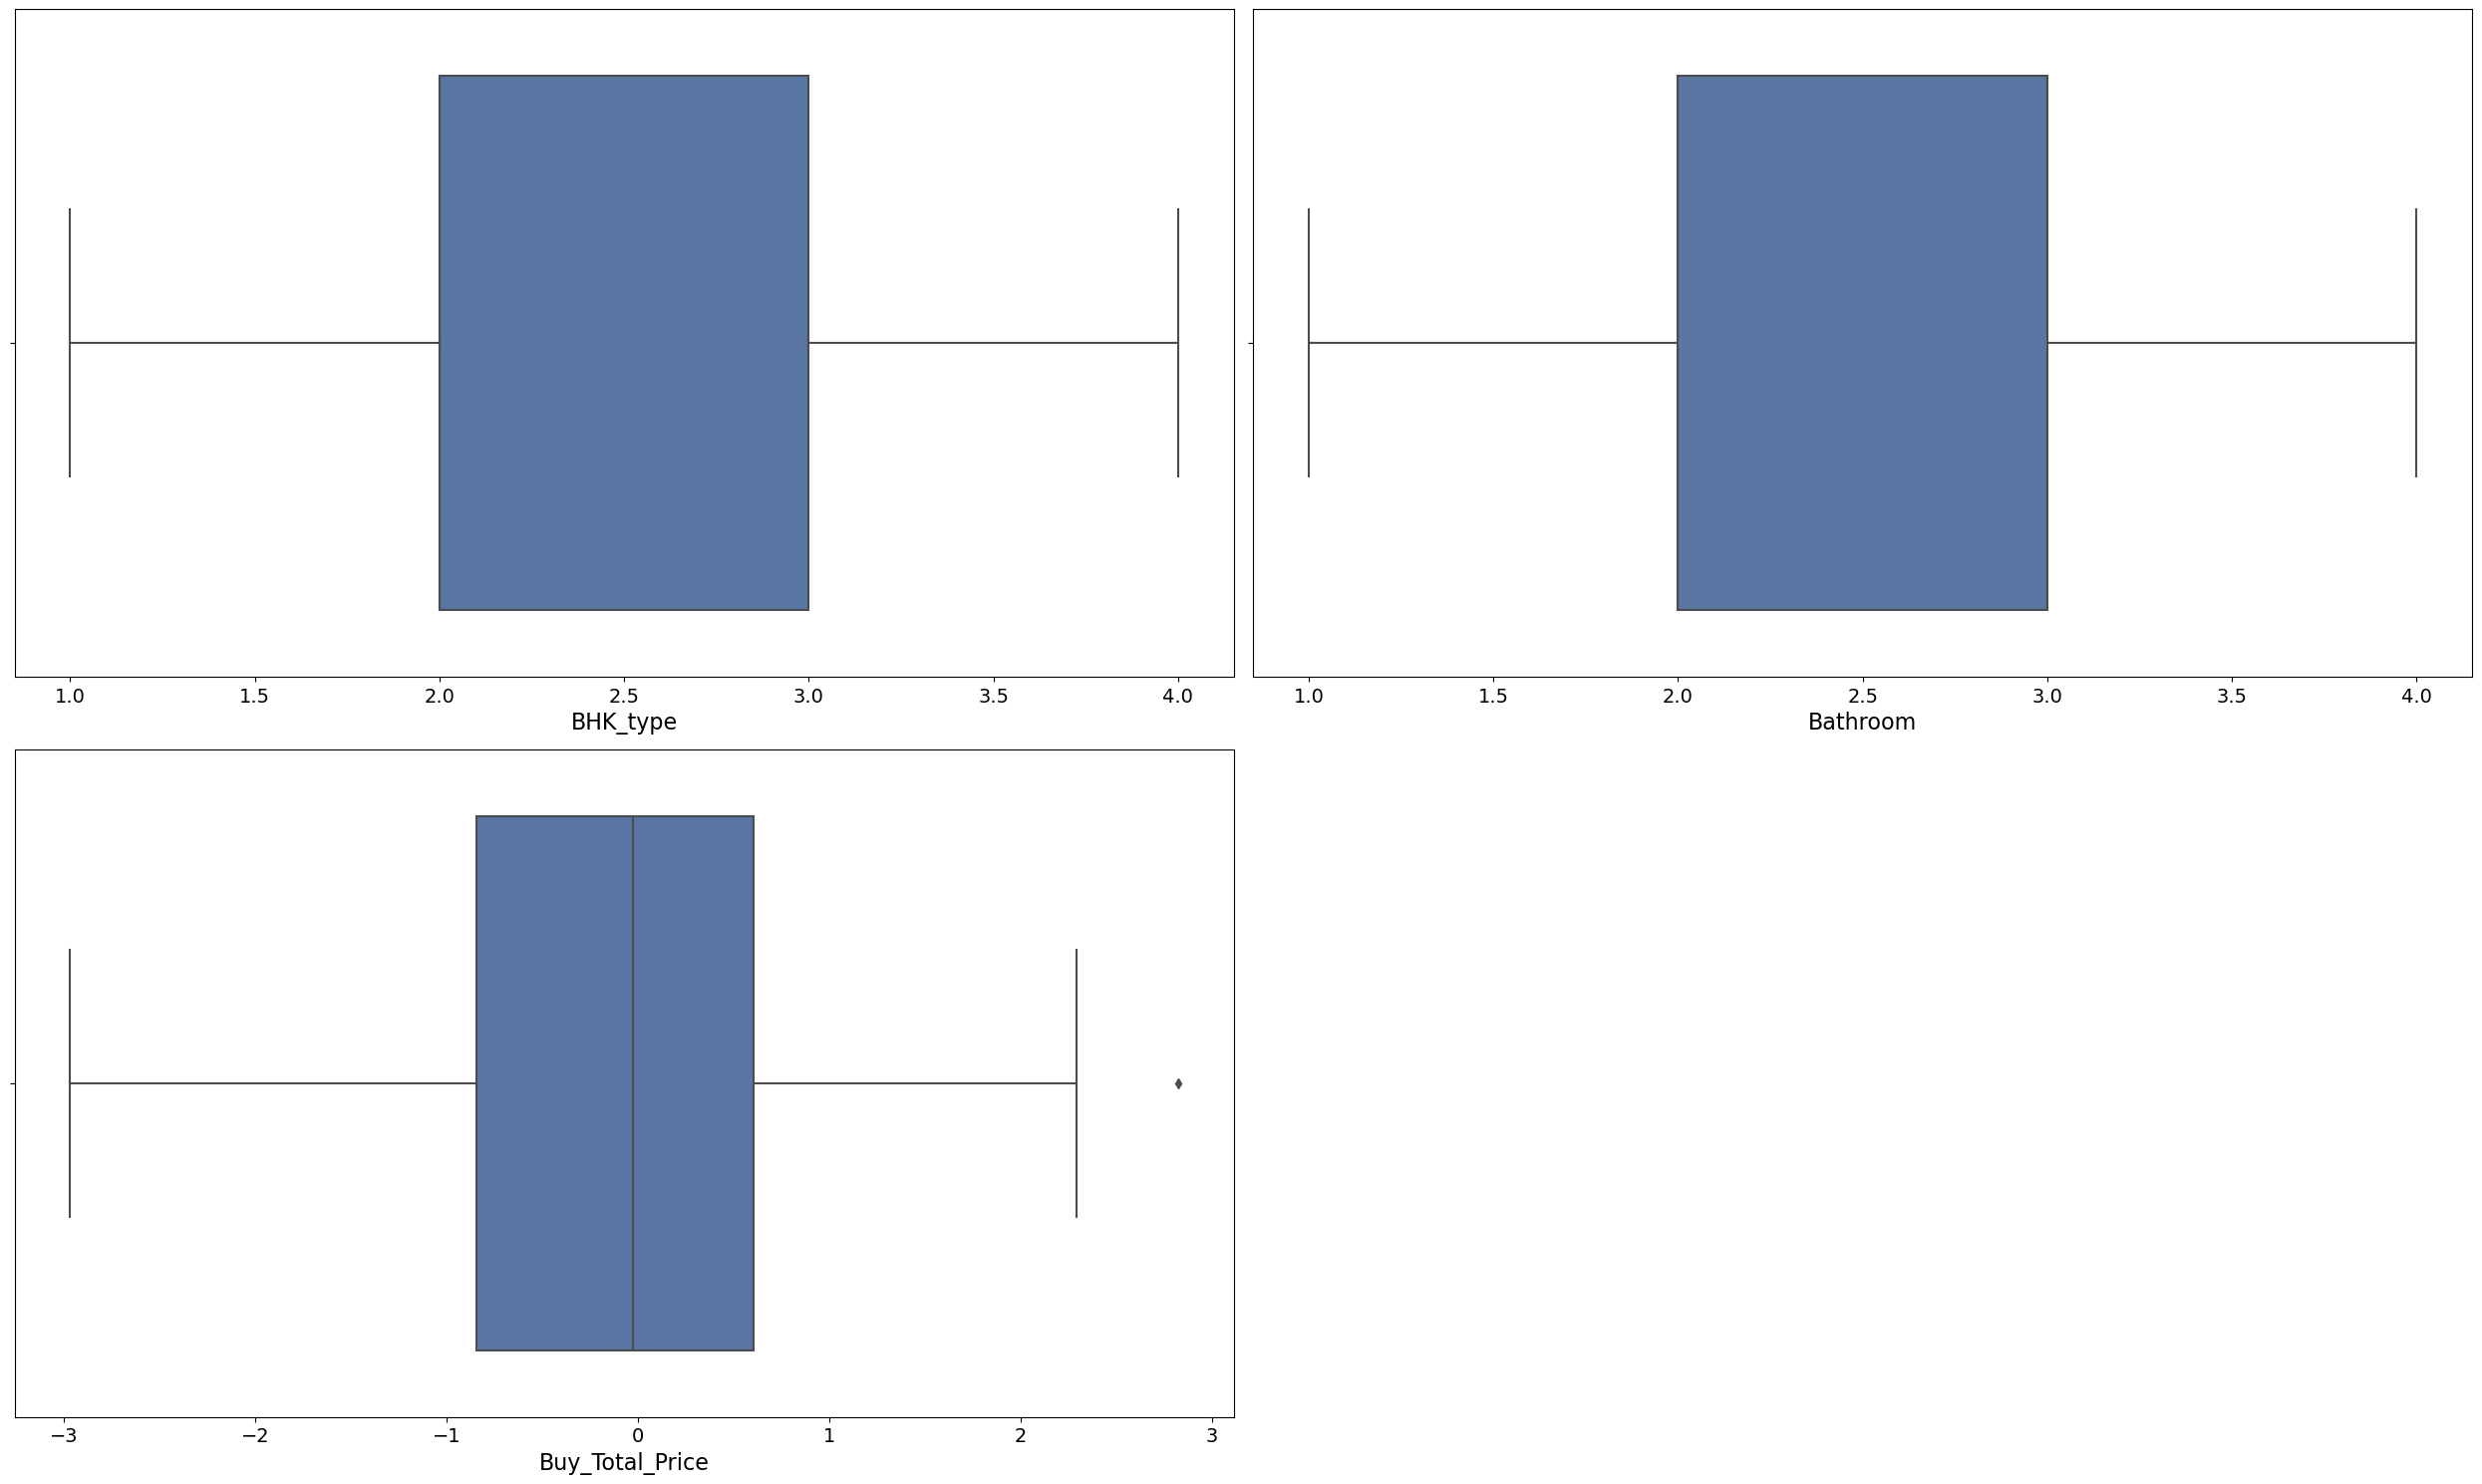

In [84]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in num_col:
    if plotnumber<=10:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(rotation=0,fontsize=16)
    plotnumber+=1
plt.show()

In [85]:
df

,BHK_type,Property_Type,Bathroom,City,State_Code,Country,Landmarks,Car_Parking,Buy_Total_Price
0,2,Nsr Brindavan Annex...,2.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.069079
1,3,"Aratt Royal Manor, ...",3.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.578699
2,2,Dream Homes Our Pla...,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Car,0.021923
3,2,Cheri Residency,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Bike and Car,-0.162118
4,2,Prestige Ferns Resi...,2.0,Bangalore,KA,India,Byg Brewski Brewing Company,Car,0.771566
...,...,...,...,...,...,...,...,...,...
214,1,Condo,1.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,0.713649
215,2,Condo,2.0,Chicago,IL,United States,CHI - Near West Side,Bike and Car,0.943326
216,3,Condo,2.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,1.955741
217,2,Condo,2.0,Chicago,IL,United States,CHI - Irving Park,Bike and Car,1.114307


In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
df

,BHK_type,Property_Type,Bathroom,City,State_Code,Country,Landmarks,Car_Parking,Buy_Total_Price
0,2,Nsr Brindavan Annex...,2.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.069079
1,3,"Aratt Royal Manor, ...",3.0,Bangalore,KA,India,Narasimha Chitramandira,Bike and Car,0.578699
2,2,Dream Homes Our Pla...,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Car,0.021923
3,2,Cheri Residency,2.0,Bangalore,KA,India,BADAMI'S SWEETS AND RESTAURANT,Bike and Car,-0.162118
4,2,Prestige Ferns Resi...,2.0,Bangalore,KA,India,Byg Brewski Brewing Company,Car,0.771566
...,...,...,...,...,...,...,...,...,...
209,1,Condo,1.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,0.713649
210,2,Condo,2.0,Chicago,IL,United States,CHI - Near West Side,Bike and Car,0.943326
211,3,Condo,2.0,Chicago,IL,United States,CHI - Near North Side,Bike and Car,1.955741
212,2,Condo,2.0,Chicago,IL,United States,CHI - Irving Park,Bike and Car,1.114307


In [88]:
df.isnull().sum()

BHK_type           0
Property_Type      0
Bathroom           0
City               0
State_Code         0
Country            0
Landmarks          0
Car_Parking        0
Buy_Total_Price    0
dtype: int64

## Encoding of object data

In [89]:
cat_col

['Property_Type', 'City', 'State_Code', 'Country', 'Landmarks', 'Car_Parking']

In [90]:
df['Property_Type'].value_counts()

Property_Type
Independent House         40
Standalone Building       34
Condo                     14
Purvanchal Royal Pa...     7
Apartment                  5
                          ..
Ram Mansion, Egmore        1
Dharmeka Square,thi...     1
Ram Mansion                1
Jawhar Aysha Towers        1
Shastri Co-operativ...     1
Name: count, Length: 104, dtype: int64

- Almost all are unique, so we will drop it.

In [91]:
df = df.drop(columns=['Property_Type'])

In [92]:
df = df.drop(columns=['Landmarks'])

## Label Encoder

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Car_Parking']=le.fit_transform(df['Car_Parking'])

In [94]:
df['State_Code']=le.fit_transform(df['State_Code'])

In [95]:
df['City']=le.fit_transform(df['City'])

In [96]:
df['Country']=le.fit_transform(df['Country'])

In [97]:
df.head()

,BHK_type,Bathroom,City,State_Code,Country,Car_Parking,Buy_Total_Price
0,2,2.0,0,3,0,1,0.069079
1,3,3.0,0,3,0,1,0.578699
2,2,2.0,0,3,0,2,0.021923
3,2,2.0,0,3,0,1,-0.162118
4,2,2.0,0,3,0,2,0.771566


In [98]:
df.columns

Index(['BHK_type', 'Bathroom', 'City', 'State_Code', 'Country', 'Car_Parking',
       'Buy_Total_Price'],
      dtype='object')

In [99]:
df.dtypes

BHK_type             int64
Bathroom           float64
City                 int32
State_Code           int32
Country              int32
Car_Parking          int32
Buy_Total_Price    float64
dtype: object

## Correlation

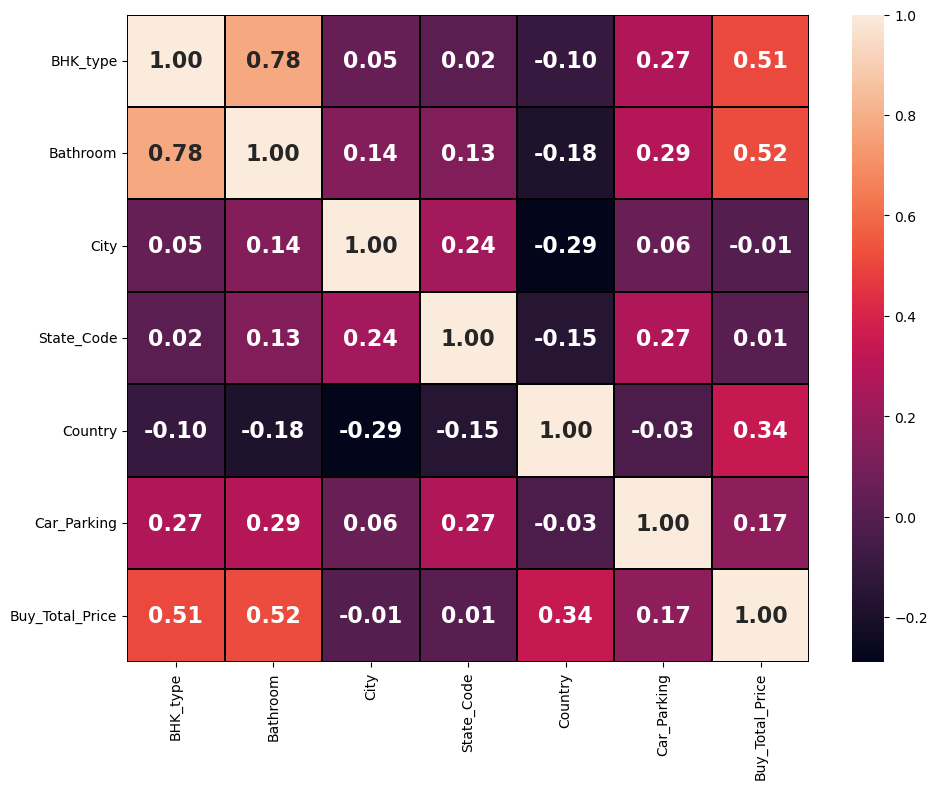

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [101]:
df.corr()['Buy_Total_Price'].sort_values(ascending=False).to_frame()

,Buy_Total_Price
Buy_Total_Price,1.000000
Bathroom,0.516710
BHK_type,0.507948
Country,0.343742
Car_Parking,0.171136
State_Code,0.011551
City,-0.007081


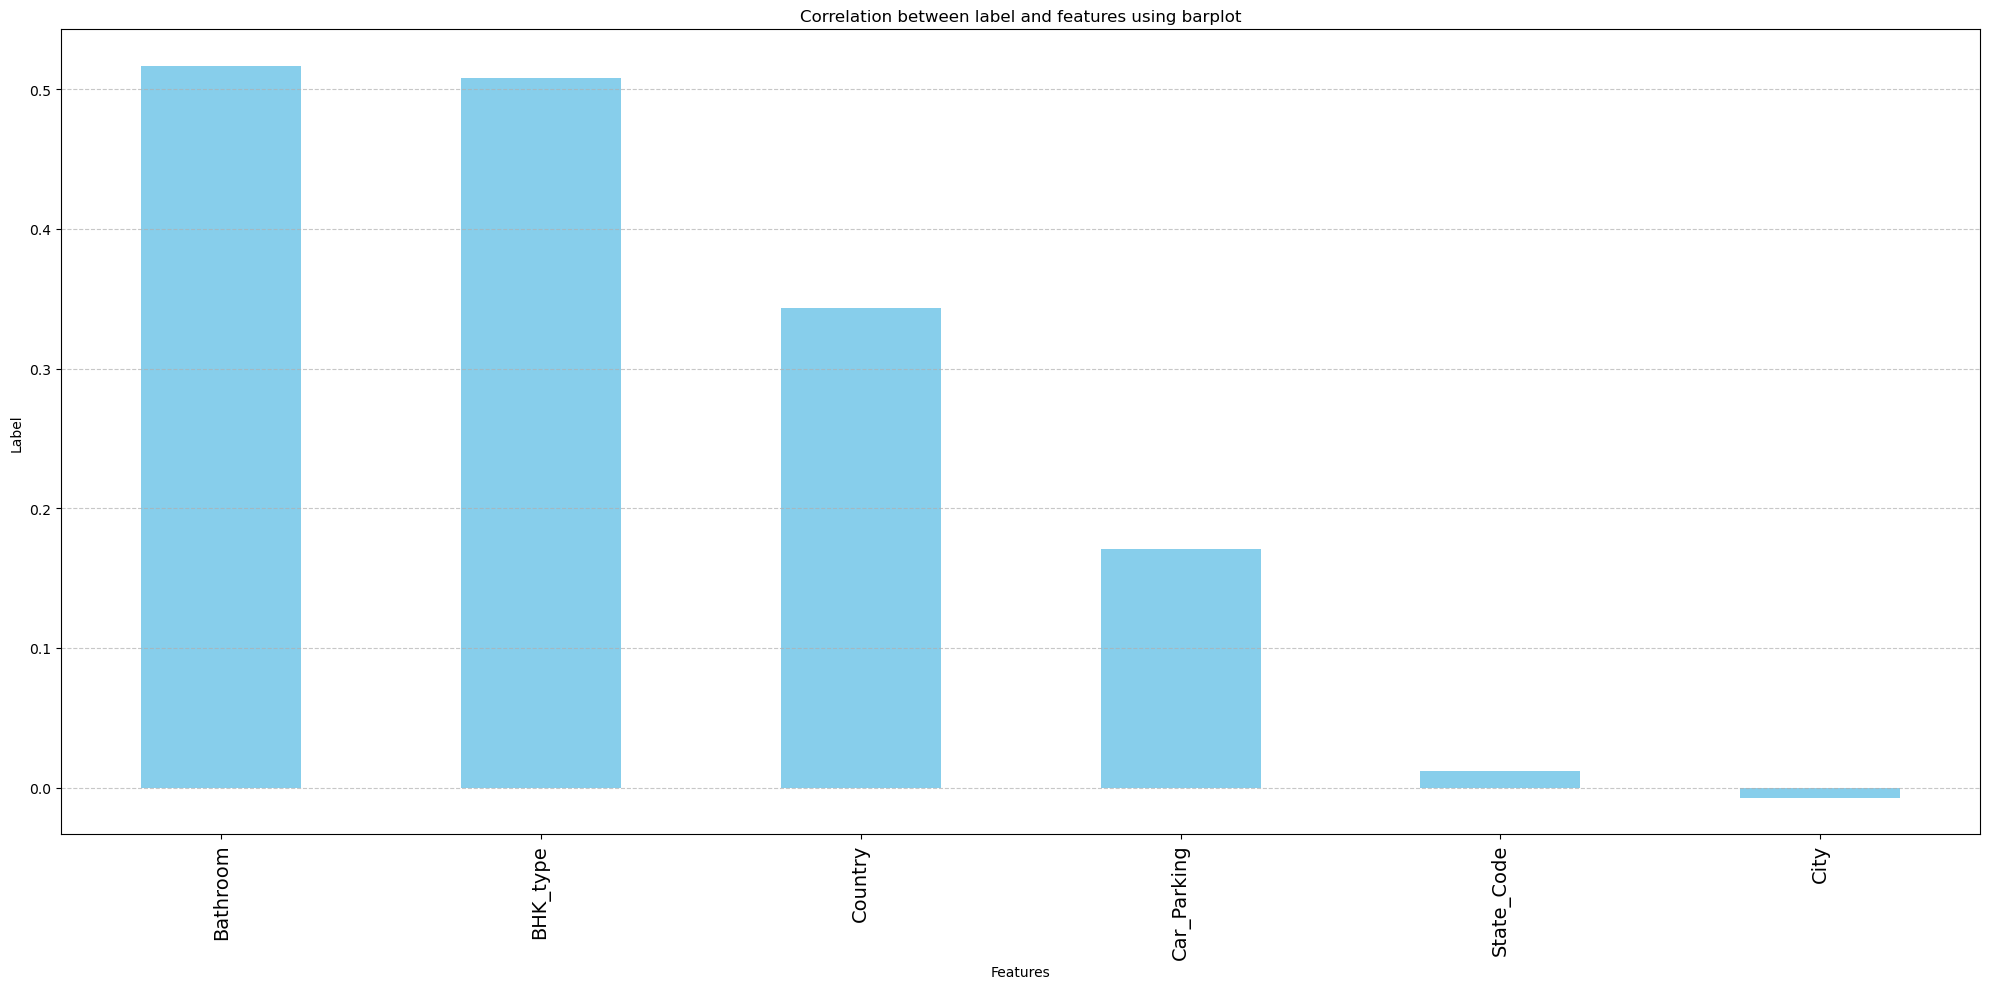

In [102]:
plt.figure(figsize=(20,10))
df.corr()['Buy_Total_Price'].sort_values(ascending=False).drop(['Buy_Total_Price']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Machine Learning Model 1

In [103]:
## Buy_Total_Price

In [104]:
X = df.drop('Buy_Total_Price', axis=1)
Y = df['Buy_Total_Price']

In [105]:
X.head()

,BHK_type,Bathroom,City,State_Code,Country,Car_Parking
0,2,2.0,0,3,0,1
1,3,3.0,0,3,0,1
2,2,2.0,0,3,0,2
3,2,2.0,0,3,0,1
4,2,2.0,0,3,0,2


In [106]:
Y.head()

0    0.069079
1    0.578699
2    0.021923
3   -0.162118
4    0.771566
Name: Buy_Total_Price, dtype: float64

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,BHK_type,Bathroom,City,State_Code,Country,Car_Parking
0,-0.462106,-0.287919,-1.770711,-0.142038,-0.264575,-0.111946
1,0.674569,0.853094,-1.770711,-0.142038,-0.264575,-0.111946
2,-0.462106,-0.287919,-1.770711,-0.142038,-0.264575,1.599233
3,-0.462106,-0.287919,-1.770711,-0.142038,-0.264575,-0.111946
4,-0.462106,-0.287919,-1.770711,-0.142038,-0.264575,1.599233
...,...,...,...,...,...,...
209,-1.598781,-1.428932,-1.094650,-0.582560,3.779645,-0.111946
210,-0.462106,-0.287919,-1.094650,-0.582560,3.779645,-0.111946
211,0.674569,-0.287919,-1.094650,-0.582560,3.779645,-0.111946
212,-0.462106,-0.287919,-1.094650,-0.582560,3.779645,-0.111946


## variance_inflation_factor

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF Values,Features
0,2.673323,BHK_type
1,2.776161,Bathroom
2,1.149893,City
3,1.176746,State_Code
4,1.127838,Country
5,1.179031,Car_Parking


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


In [112]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)  

Best accuracy is 0.6186704630414213 at random state 185


## Splitting datasets.

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [115]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.5019613998740693
R-squared Score on training data: 48.094866684871704
Mean Absolute Error: 0.5117086558066893
Mean Squared Error: 0.4215621913882922
Root Mean Squared Error: 0.6492782080035431

Cross Validation Score: [ 0.12885663  0.05806186 -0.28318047  0.03448608 -0.55153243]
Cross Validation Score Mean: -0.12266166578857396
R-squared Score - Cross Validation Score is 62.462306566264324


In [116]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -0.014511158906868493
R-squared Score on training data: 0.0
Mean Absolute Error: 0.7207916727651744
Mean Squared Error: 0.8587277115237958
Root Mean Squared Error: 0.9266756236805821

Cross Validation Score: [-0.00114379 -0.01505506 -0.30831257 -0.99950594 -0.05358269]
Cross Validation Score Mean: -0.27552000746199196
R-squared Score - Cross Validation Score is 26.100884855512348


In [117]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.5022670082200429
R-squared Score on training data: 48.09296712443732
Mean Absolute Error: 0.5108385085317467
Mean Squared Error: 0.42130351078802825
Root Mean Squared Error: 0.6490789711491416

Cross Validation Score: [ 0.13267233  0.06539941 -0.28044649  0.03159688 -0.54836362]
Cross Validation Score Mean: -0.11982829719786234
R-squared Score - Cross Validation Score is 62.20953054179053


In [118]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.2656266345610381
R-squared Score on training data: 85.41699568679154
Mean Absolute Error: 0.5981468030071596
Mean Squared Error: 0.6216065283963221
Root Mean Squared Error: 0.7884202739632727

Cross Validation Score: [-0.20093113 -0.03887434  0.28312088  0.38137627  0.05286278]
Cross Validation Score Mean: 0.09551089418449951
R-squared Score - Cross Validation Score is 17.01157403765386


In [119]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.5757593054291248
R-squared Score on training data: 82.3287173543075
Mean Absolute Error: 0.48529348750669654
Mean Squared Error: 0.3590963367782497
Root Mean Squared Error: 0.5992464741475328

Cross Validation Score: [ 0.19715798  0.51815897  0.26739416  0.35814804 -0.10180975]
Cross Validation Score Mean: 0.24780988040883875
R-squared Score - Cross Validation Score is 32.794942502028604


In [120]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.5242201090840194
R-squared Score on training data: 85.41699568679154
Mean Absolute Error: 0.5070916753439876
Mean Squared Error: 0.40272142236025155
Root Mean Squared Error: 0.6346033582957559

Cross Validation Score: [ 0.08445138  0.46676924  0.14971807  0.27193532 -0.37367924]
Cross Validation Score Mean: 0.11983895533693456
R-squared Score - Cross Validation Score is 40.43811537470848


In [121]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.615341348999526
R-squared Score on training data: 78.9470715339176
Mean Absolute Error: 0.4543608884622271
Mean Squared Error: 0.32559232117996884
Root Mean Squared Error: 0.5706069761052426

Cross Validation Score: [0.07467456 0.33964818 0.44023457 0.45195224 0.17544185]
Cross Validation Score Mean: 0.29639027891786
R-squared Score - Cross Validation Score is 31.895107008166594


## Hyper parameter tuning on the best ML Model

In [122]:
# Choosing the Extra Tree  Regressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [123]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [124]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [125]:
best_params = grid_search.best_params_
best_params


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [126]:
final_model_1 = ExtraTreesRegressor(max_depth=20,
                                    min_samples_leaf=1,
                                    min_samples_split=10,
                                    n_estimators=100)

In [127]:
final_model_1.fit(X_train, Y_train)

ExtraTreesRegressor(max_depth=20, min_samples_split=10)

In [128]:
pred = final_model_1.predict(X_test)

In [129]:
mse = mean_squared_error(Y_test, pred)

In [130]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3994722192723377


In [131]:
r2_score(Y_test,pred)

0.5280587563595265

In [132]:
import joblib
filename = "Cap_m1.pkl"
joblib.dump(final_model_1, filename)

['Cap_m1.pkl']

In [133]:
model=joblib.load("Cap_m1.pkl")
prediction=model.predict(X_test)
prediction

array([ 0.96698321, -1.02284047,  0.79055161, -1.56864583, -0.47135904,
        0.33338654, -0.37659131, -0.23410321,  0.60491243, -0.42533282,
       -0.2432748 , -0.86636126, -1.02284047,  0.13916057,  1.08406693,
       -0.58478964, -0.04456931,  1.09507441,  0.11415098, -1.53266772,
        1.41363135,  1.08135419, -1.42667889,  1.21394359, -1.56864583,
       -1.00716533, -0.20975556,  0.11794872,  0.25560981,  0.06519598,
        0.60491243,  1.48838221,  0.42235663, -0.43759861,  0.45747804,
        1.44002594,  0.37919569,  0.25560981,  0.25469637,  0.93165942,
       -1.25834134,  0.58233905, -1.00716533])

In [134]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a

In [135]:
df.head()

,Predicted,Original
0,0.966983,1.060543
1,-1.022840,-1.216618
2,0.790552,0.933989
3,-1.568646,-1.236131
4,-0.471359,-1.072075


In [ ]:
- Buy_Total_Price: Regression models to estimate the monetary value of properties.
Model-1 achieves an accuracy of 85% with Extra Trees Regressor.